# EDA - HDB Resale

### Import Environment Modules and Data

In [129]:
# Import Python Modules

# Essential Modules
import numpy as np
import pandas as pd

# Graphical Modules
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Pipeline and Train Test Split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

## SciKit Learning Preprocessing  
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PowerTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

## SciKit Learn ML Models

# Linear Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Tree Based Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb


# Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

# GridSearch CV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV



### Load Data

The following is a temporary placeholder. In a real end to end project, we need to connect to BigQuery and download the data from BigQuery using SQL extraction.

In [130]:
# Load the dataset
df = pd.read_csv('./data/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv')

In [131]:
len(df)

209579

## Problem Statement

**We work for a property consultancy company. This company want to develop an end to end machine learning pipeline that could deliver housing price prediction to customer.**

**Our task is to develop a machine learning model that could accurately predict the resale prices of HDB resale flats. This model will assist buyers or sellers in planning their budgets more effectively and set realistic expectations. This model also need to help buyers determine the type of flat they can afford and in which location. This model also should provide sellers with valuable information regarding the potential market value of their property.**

## Basic Data Exploration

In [132]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


#### Detecting Duplicates

In [133]:
# Detecting duplicates
df.duplicated().sum()

304

In [134]:
# Sorting Duplicated Rows
df[df.duplicated(keep=False)].sort_values(by=list(df.columns))

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
224,2017-01,BUKIT MERAH,4 ROOM,106,HENDERSON CRES,07 TO 09,81.0,Improved,1975,57 years,470000.0
243,2017-01,BUKIT MERAH,4 ROOM,106,HENDERSON CRES,07 TO 09,81.0,Improved,1975,57 years,470000.0
304,2017-01,CENTRAL AREA,3 ROOM,271,QUEEN ST,16 TO 18,68.0,Improved,1979,61 years 02 months,470000.0
305,2017-01,CENTRAL AREA,3 ROOM,271,QUEEN ST,16 TO 18,68.0,Improved,1979,61 years 02 months,470000.0
505,2017-01,JURONG EAST,4 ROOM,265,TOH GUAN RD,04 TO 06,101.0,Model A,1998,80 years 09 months,470000.0
...,...,...,...,...,...,...,...,...,...,...,...
201242,2025-05,HOUGANG,4 ROOM,994C,BUANGKOK LINK,10 TO 12,93.0,Model A,2021,94 years 09 months,675000.0
209045,2025-05,YISHUN,4 ROOM,426B,YISHUN AVE 11,10 TO 12,92.0,Model A,2015,88 years 11 months,595000.0
209048,2025-05,YISHUN,4 ROOM,426B,YISHUN AVE 11,10 TO 12,92.0,Model A,2015,88 years 11 months,595000.0
204545,2025-06,SEMBAWANG,2 ROOM,103A,CANBERRA ST,04 TO 06,38.0,2-room,2020,94 years 07 months,350000.0


In [135]:
duplicates_percentage = df.duplicated().sum() / len(df) * 100
print(f"Total number of duplicates: {df.duplicated().sum()}")
print(f"Percentage of duplicates in the dataset: {duplicates_percentage:.2f}%")

Total number of duplicates: 304
Percentage of duplicates in the dataset: 0.15%


**There are 304 duplicated items detected, this represent 0.15% of the total data. There are 2 possible reason for the duplicates. The first reason is there is supplication due to system error or reporting error. The second reason is that there could be same transaction on the same block at the same price at the same storey range.**

**In the context of machine learning, the duplicates only represent 0.15% of we overall dataset, we believe it will not harm our overall prediction performance. Therefore, we will remove the duplicates for machine learning.**

In [136]:
df.drop_duplicates(inplace=True)

In [137]:
df.duplicated().sum()

0

In [138]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


#### Detecting Missing Values

In [139]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

### Data Structure Analysis

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209275 entries, 0 to 209578
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                209275 non-null  object 
 1   town                 209275 non-null  object 
 2   flat_type            209275 non-null  object 
 3   block                209275 non-null  object 
 4   street_name          209275 non-null  object 
 5   storey_range         209275 non-null  object 
 6   floor_area_sqm       209275 non-null  float64
 7   flat_model           209275 non-null  object 
 8   lease_commence_date  209275 non-null  int64  
 9   remaining_lease      209275 non-null  object 
 10  resale_price         209275 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 19.2+ MB


In [141]:
# Selecting numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()  
# Selecting categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

In [142]:
df.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,209275.000000,209275.000000,2.092750e+05
mean,96.870532,1996.322638,5.166457e+05
std,24.040256,14.235607,1.823789e+05
min,31.000000,1966.000000,1.400000e+05
25%,82.000000,1985.000000,3.800000e+05
50%,93.000000,1996.000000,4.850000e+05
75%,112.000000,2011.000000,6.200000e+05
max,366.700000,2022.000000,1.658888e+06


In [143]:
# Fro numerical columns, we loop through each column and identify unique values
for col in num_cols:
    unique_values = df[col].unique()
    print(f"Column: {col}, Unique Values: {len(unique_values)}")
    if len(unique_values) < 10:
        print(f"Unique values in {col}: {unique_values}")

Column: floor_area_sqm, Unique Values: 183
Column: lease_commence_date, Unique Values: 57
Column: resale_price, Unique Values: 4381


In [144]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 209275 entries, 0 to 209578
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                209275 non-null  object 
 1   town                 209275 non-null  object 
 2   flat_type            209275 non-null  object 
 3   block                209275 non-null  object 
 4   street_name          209275 non-null  object 
 5   storey_range         209275 non-null  object 
 6   floor_area_sqm       209275 non-null  float64
 7   flat_model           209275 non-null  object 
 8   lease_commence_date  209275 non-null  int64  
 9   remaining_lease      209275 non-null  object 
 10  resale_price         209275 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 19.2+ MB


In [145]:
df['month'].unique()

array(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
       '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
       '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
       '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
       '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
       '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06',
       '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12',
       '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06',
       '2023-07', '2023-08', '2023-09', '2023-10', 

**Can convert to numerical year and month values.**

In [146]:
df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [147]:
df['town'].value_counts()

town
SENGKANG           17179
PUNGGOL            15295
WOODLANDS          14868
YISHUN             14284
TAMPINES           14233
JURONG WEST        13868
BEDOK              10935
HOUGANG            10528
CHOA CHU KANG       9502
BUKIT BATOK         8590
ANG MO KIO          8572
BUKIT MERAH         8016
BUKIT PANJANG       7516
TOA PAYOH           6642
KALLANG/WHAMPOA     6391
SEMBAWANG           6176
PASIR RIS           6041
QUEENSTOWN          5718
GEYLANG             5136
CLEMENTI            4642
JURONG EAST         4274
SERANGOON           3734
BISHAN              3694
CENTRAL AREA        1646
MARINE PARADE       1281
BUKIT TIMAH          514
Name: count, dtype: int64

**To be one hot encoded.**

In [148]:
df['flat_type'].unique()

array(['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [149]:
df['flat_type'].value_counts()

flat_type
4 ROOM              88457
5 ROOM              51545
3 ROOM              49809
EXECUTIVE           15207
2 ROOM               4097
MULTI-GENERATION       83
1 ROOM                 77
Name: count, dtype: int64

**Originally decided to use ordinal encoding. However, during EDA, there are outliers that belong to the 3 room flat. Will use one-hot encoding instead.**

In [150]:
df['block'].unique()

array(['406', '108', '602', ..., '479B', '479C', '478A'], dtype=object)

In [151]:
df['street_name'].unique()

array(['ANG MO KIO AVE 10', 'ANG MO KIO AVE 4', 'ANG MO KIO AVE 5',
       'ANG MO KIO AVE 1', 'ANG MO KIO AVE 3', 'ANG MO KIO AVE 9',
       'ANG MO KIO AVE 8', 'ANG MO KIO AVE 6', 'ANG MO KIO ST 52',
       'BEDOK NTH AVE 4', 'BEDOK NTH AVE 1', 'BEDOK NTH RD',
       'BEDOK STH AVE 1', 'BEDOK RESERVOIR RD', 'CHAI CHEE ST',
       'BEDOK NTH ST 3', 'BEDOK STH RD', 'CHAI CHEE AVE',
       'NEW UPP CHANGI RD', 'CHAI CHEE DR', 'BEDOK STH AVE 2',
       'BEDOK NTH AVE 3', 'BEDOK RESERVOIR VIEW', 'CHAI CHEE RD',
       'LENGKONG TIGA', 'BEDOK CTRL', 'JLN DAMAI', 'BEDOK NTH AVE 2',
       'BEDOK STH AVE 3', 'SIN MING RD', 'SIN MING AVE', 'BISHAN ST 12',
       'BISHAN ST 13', 'BISHAN ST 22', 'BISHAN ST 24', 'BISHAN ST 23',
       'BRIGHT HILL DR', 'SHUNFU RD', 'BT BATOK ST 34', 'BT BATOK ST 51',
       'BT BATOK ST 11', 'BT BATOK ST 52', 'BT BATOK ST 21',
       'BT BATOK EAST AVE 5', 'BT BATOK WEST AVE 6', 'BT BATOK CTRL',
       'BT BATOK WEST AVE 8', 'BT BATOK EAST AVE 4', 'BT BATOK ST 3

**Block and street name to be dropped for now.**

In [152]:
df['storey_range'].unique()

array(['10 TO 12', '01 TO 03', '04 TO 06', '07 TO 09', '13 TO 15',
       '19 TO 21', '22 TO 24', '16 TO 18', '34 TO 36', '28 TO 30',
       '37 TO 39', '49 TO 51', '25 TO 27', '40 TO 42', '31 TO 33',
       '46 TO 48', '43 TO 45'], dtype=object)

**Convert to middle value in ordinal form.**

In [153]:
df['flat_model'].unique()

array(['Improved', 'New Generation', 'DBSS', 'Standard', 'Apartment',
       'Simplified', 'Model A', 'Premium Apartment', 'Adjoined flat',
       'Model A-Maisonette', 'Maisonette', 'Type S1', 'Type S2',
       'Model A2', 'Terrace', 'Improved-Maisonette', 'Premium Maisonette',
       'Multi Generation', 'Premium Apartment Loft', '2-room', '3Gen'],
      dtype=object)

**To be one hot encoded.**

In [154]:
df['remaining_lease'].unique()

array(['61 years 04 months', '60 years 07 months', '62 years 05 months',
       '62 years 01 month', '63 years', '61 years 06 months',
       '58 years 04 months', '59 years 08 months', '59 years 06 months',
       '60 years', '62 years 08 months', '61 years', '60 years 10 months',
       '59 years 03 months', '61 years 05 months', '60 years 04 months',
       '62 years', '60 years 03 months', '63 years 09 months',
       '61 years 01 month', '61 years 10 months', '58 years 06 months',
       '59 years 04 months', '62 years 11 months', '60 years 08 months',
       '93 years 08 months', '93 years 07 months', '60 years 01 month',
       '94 years 08 months', '78 years 04 months', '60 years 06 months',
       '62 years 06 months', '58 years', '70 years 08 months',
       '63 years 04 months', '63 years 06 months', '67 years 07 months',
       '61 years 07 months', '68 years 02 months', '68 years 03 months',
       '56 years', '67 years 09 months', '67 years 05 months',
       '63 years 07

**Need to convert to months.**

## Resale Price Analysis

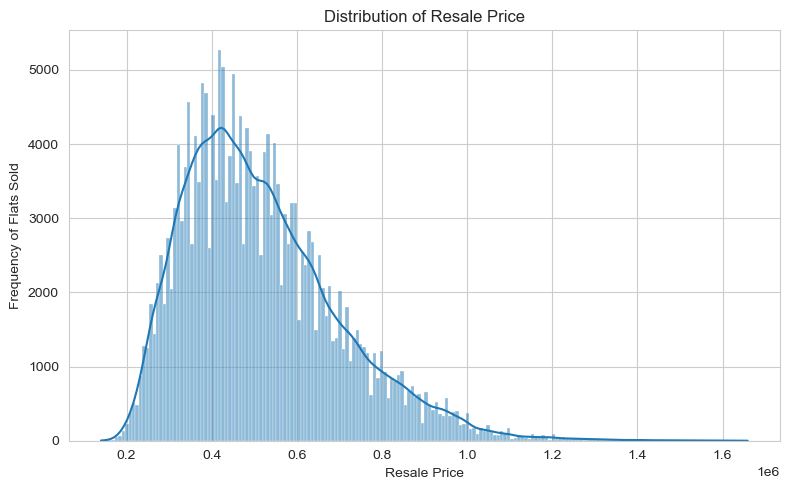

In [155]:
fig, ax = plt.subplots(figsize=(8,5))  

sns.histplot(df.resale_price, kde=True)

ax.set_title('Distribution of Resale Price')
ax.set_xlabel('Resale Price')
ax.set_ylabel('Frequency of Flats Sold')

plt.tight_layout()
plt.show()

In [156]:
df['resale_price'].describe()

count    2.092750e+05
mean     5.166457e+05
std      1.823789e+05
min      1.400000e+05
25%      3.800000e+05
50%      4.850000e+05
75%      6.200000e+05
max      1.658888e+06
Name: resale_price, dtype: float64

**The mean of resale price is around $516K and the median is around 485K. Resale prices range to $140K to $1.65M. Based on the chart, the distribution of the resale price skewed to the right. This means that there are expensive flat that extends to the right. Lower priced flats are more concentrated.**

In [157]:
# Checking for skewness in the resale price distribution
skewness = df['resale_price'].skew()

print(f"Skewness of Resale Price: {skewness:.2f}")
if skewness > 0.5: # type: ignore[arg-type]
    print("The distribution is positively skewed.")
elif skewness < -0.5: # type: ignore[arg-type]
    print("The distribution is negatively skewed.")
else:
    print("The distribution is approximately symmetric.")


Skewness of Resale Price: 0.95
The distribution is positively skewed.


**Skewness is less than 1.0, we may or may not need to transform the target but we will try to analyze the residual plot first and we will compare performance between transformed target with normal target.**

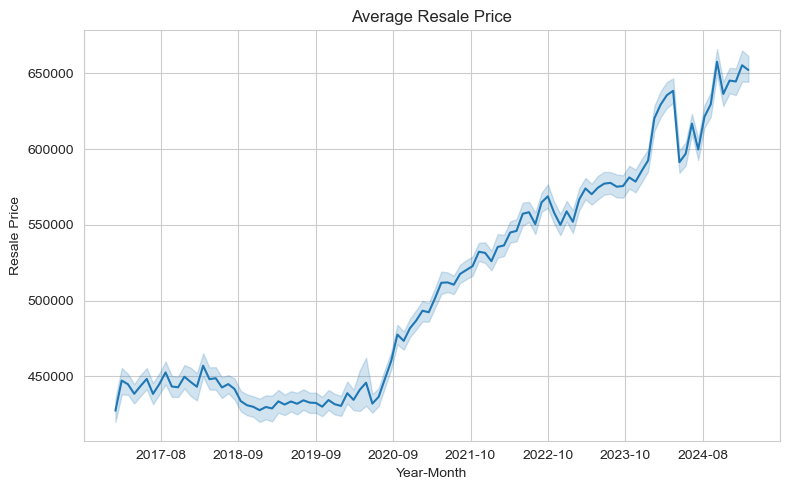

In [158]:
fig, ax = plt.subplots(figsize=(8,5))  

sns.lineplot(data=df, x='month', y='resale_price', estimator='mean')

ax.set_title('Average Resale Price')
ax.set_xlabel('Year-Month')
ax.set_ylabel('Resale Price')
ax.xaxis.set_major_locator(ticker.LinearLocator(10))

plt.tight_layout()
plt.show()

**Average resale price varies over the years. After 2019, prices has been steadily increase. Suspect that some fluctuations is due to government measures.**

### Cyclical Analysis of Resale Transaction

In [159]:
month_counts = df.month.value_counts().sort_index()
month_counts.head()

month
2017-01    1176
2017-02    1080
2017-03    1889
2017-04    1821
2017-05    1961
Name: count, dtype: int64

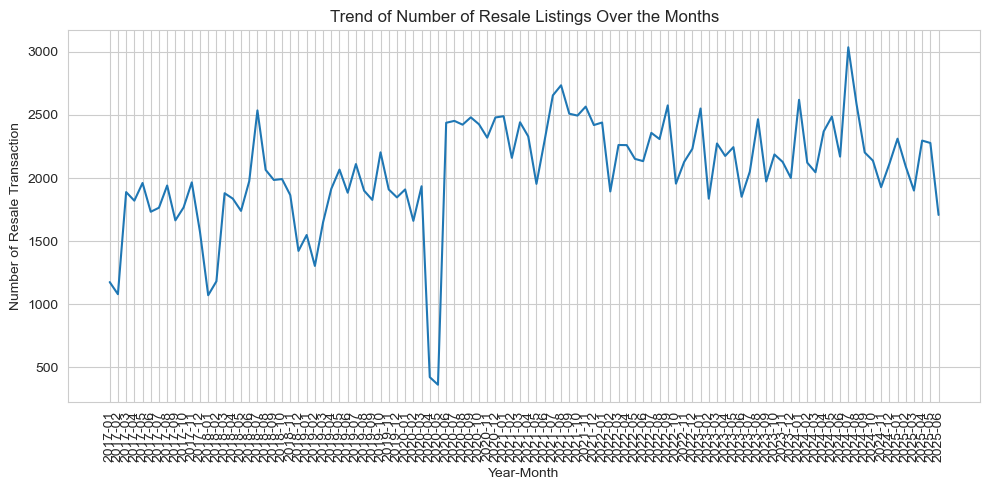

In [160]:
fig, ax = plt.subplots(figsize=(10,5))  

sns.lineplot(x=month_counts.index, y=month_counts.values)

ax.set_title('Trend of Number of Resale Listings Over the Months')
ax.set_xlabel('Year-Month')
ax.set_ylabel('Number of Resale Transaction')
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation = 90)
plt.tight_layout()
plt.show()

**HDB resale is seasonal and the month of February has the lowers resale transaction. There is a very large dip on May 2020 due to COVID19 Circuit Breaker.**

## Feature Analysis

### Flat Type

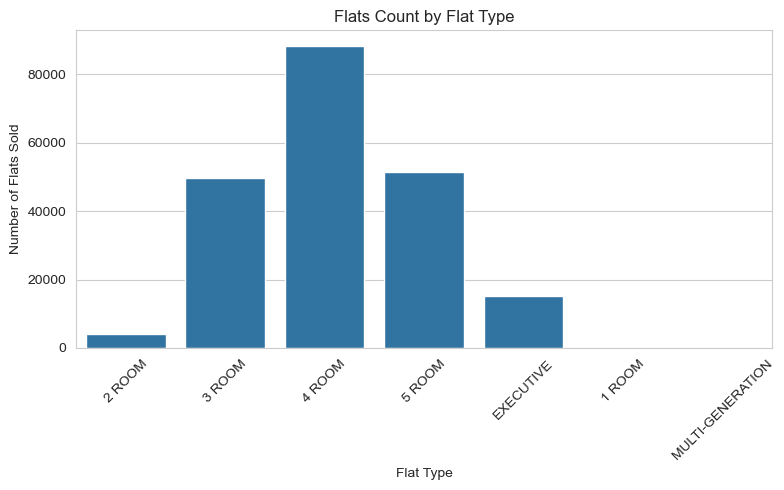

In [161]:
fig, ax = plt.subplots(figsize=(8,5))  

sns.set_style("whitegrid")
sns.countplot(data=df, x='flat_type')

ax.set_title('Flats Count by Flat Type')
ax.set_xlabel('Flat Type')
ax.set_ylabel('Number of Flats Sold')
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation = 45)

plt.tight_layout()
plt.show()

In [162]:
df.flat_type.unique()

array(['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [163]:
df.flat_type.value_counts()

flat_type
4 ROOM              88457
5 ROOM              51545
3 ROOM              49809
EXECUTIVE           15207
2 ROOM               4097
MULTI-GENERATION       83
1 ROOM                 77
Name: count, dtype: int64

**The most popular resale flat type is `4 ROOM`, follow by `5 ROOM` and `3 ROOM`.**

### Town 

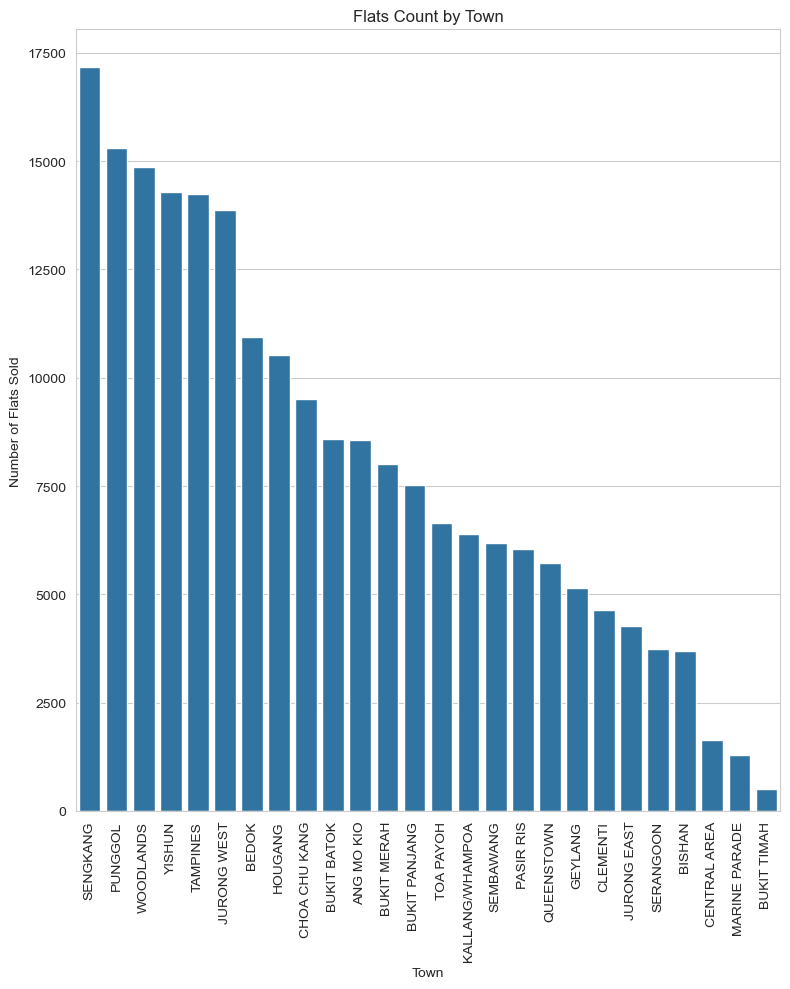

In [164]:
fig, ax1 = plt.subplots(1, 1, figsize=(8,10))  
sns.set_style("whitegrid")

sorted_town_name = df.town.value_counts()
sorted_town_name_index = sorted_town_name.index
sns.countplot(data=df, x='town', order=sorted_town_name_index, ax=ax1)

ax1.set_title('Flats Count by Town')
ax1.set_xlabel('Town')
ax1.set_ylabel('Number of Flats Sold')
ax1.set_xticks(ax1.get_xticks(), ax1.get_xticklabels(), rotation = 90)


plt.tight_layout()
plt.show()

**Top 3 town with the highest turn over is Sengkang, Punhhol and Woodlands.**

### Flat Model Name 

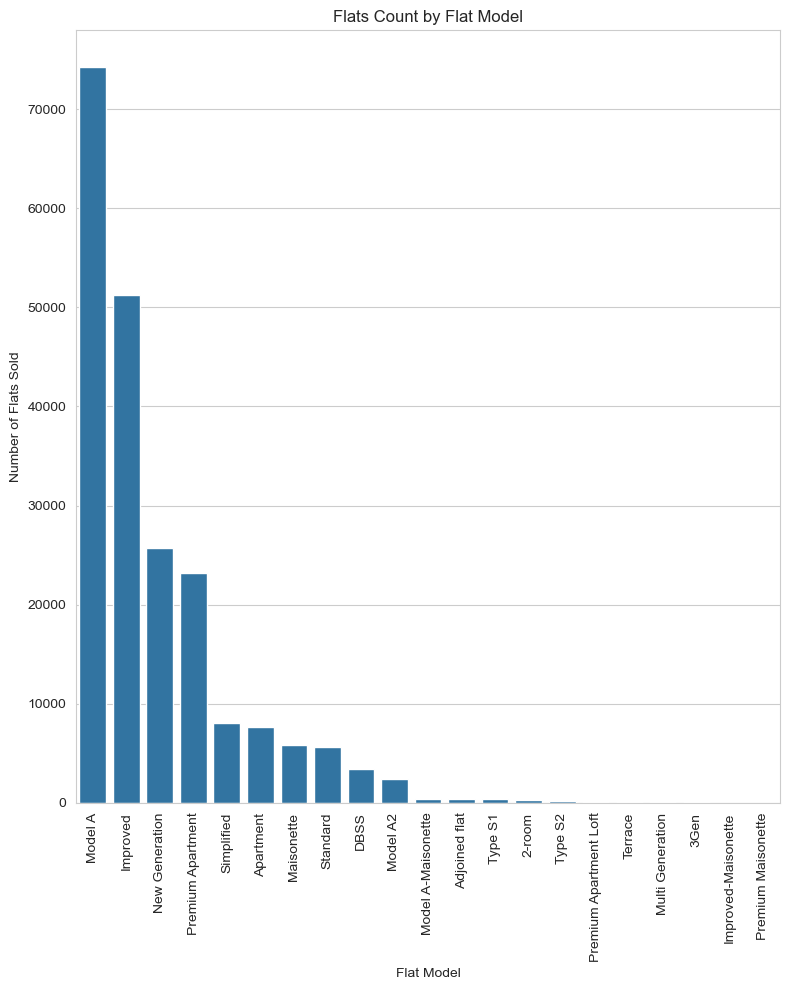

In [165]:
fig, ax1 = plt.subplots(1, 1, figsize=(8,10))  
sns.set_style("whitegrid")

sorted_flat_model_name = df.flat_model.value_counts()
sorted_flat_model_index = sorted_flat_model_name.index
sns.countplot(data=df, x='flat_model', order=sorted_flat_model_index, ax=ax1)

ax1.set_title('Flats Count by Flat Model')
ax1.set_xlabel('Flat Model')
ax1.set_ylabel('Number of Flats Sold')
ax1.set_xticks(ax1.get_xticks(), ax1.get_xticklabels(), rotation = 90)


plt.tight_layout()
plt.show()

**Top 3 model with the most transaction is Model A, Improved and New Generation.**

## Bi-Variate Analysis and Multi-Variate Analysis

### Flat Type and Resale Price

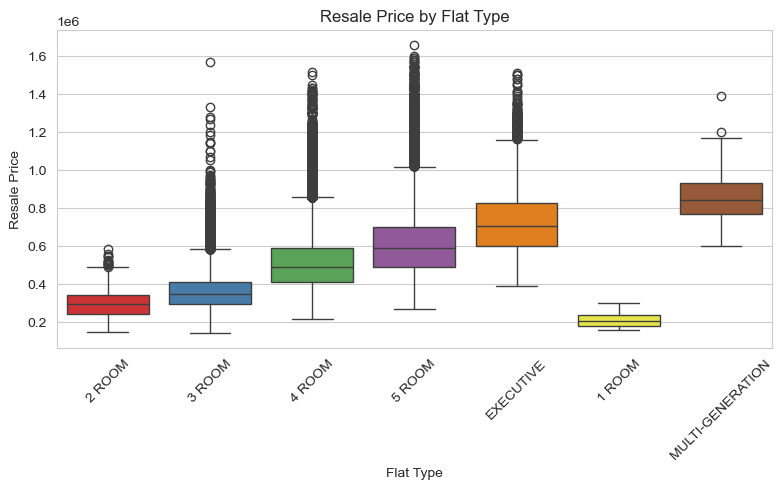

In [166]:
fig, ax = plt.subplots(figsize=(8,5))  

sns.boxplot(data=df, x='flat_type', y='resale_price', hue='flat_type', palette='Set1')

ax.set_title('Resale Price by Flat Type')
ax.set_xlabel('Flat Type')
ax.set_ylabel('Resale Price')
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation = 45)

plt.tight_layout()
plt.show()

**There are many outliers for '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', and 'EXECUTIVE' flats. Outliers likely happen maybe due to locations or renovation status.**

### Flat Type and Floor Area

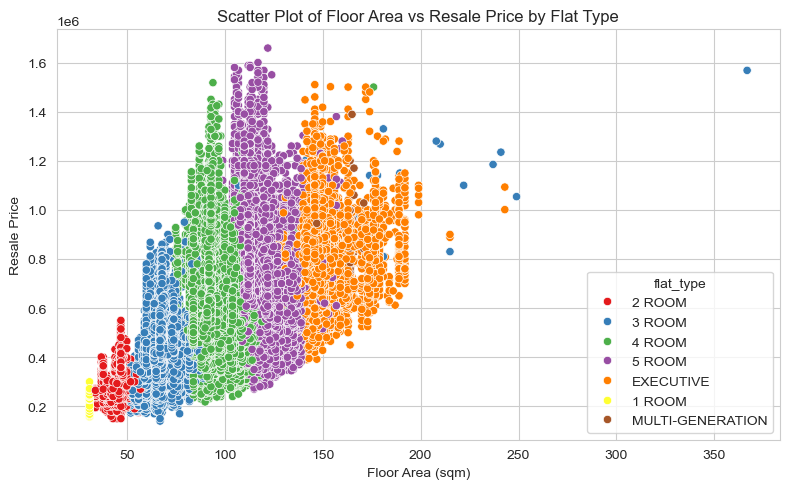

In [167]:
fig, ax = plt.subplots(figsize=(8,5))  

sns.scatterplot(data=df, x='floor_area_sqm', y='resale_price', hue='flat_type', palette='Set1')

ax.set_title('Scatter Plot of Floor Area vs Resale Price by Flat Type')
ax.set_xlabel('Floor Area (sqm)')
ax.set_ylabel('Resale Price')

plt.tight_layout()
plt.show()

**Generally, the increase in floor area result in increase in resale price.**
  
**There are 3 ROOM flats that has a very high selling price and the floor area is also quite high. We need to investigate further.**

In [168]:
outliers_3_room = df[(df['flat_type'] == '3 ROOM') & (df['floor_area_sqm'] > 150) & (df['resale_price'] > 800000)]
outliers_3_room

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
7000,2017-05,KALLANG/WHAMPOA,3 ROOM,59,JLN MA'MOR,01 TO 03,181.0,Terrace,1972,54 years 02 months,810000.0
8868,2017-06,KALLANG/WHAMPOA,3 ROOM,38,JLN BAHAGIA,01 TO 03,215.0,Terrace,1972,54 years 01 month,830000.0
19693,2017-12,KALLANG/WHAMPOA,3 ROOM,65,JLN MA'MOR,01 TO 03,249.0,Terrace,1972,53 years 07 months,1053888.0
27292,2018-05,KALLANG/WHAMPOA,3 ROOM,44,JLN BAHAGIA,01 TO 03,185.0,Terrace,1972,53 years 02 months,968000.0
29231,2018-06,KALLANG/WHAMPOA,3 ROOM,58,JLN MA'MOR,01 TO 03,174.0,Terrace,1972,53 years 02 months,950000.0
35797,2018-09,KALLANG/WHAMPOA,3 ROOM,41,JLN BAHAGIA,01 TO 03,237.0,Terrace,1972,52 years 10 months,1185000.0
53491,2019-07,KALLANG/WHAMPOA,3 ROOM,42,JLN BAHAGIA,01 TO 03,169.0,Terrace,1972,52 years 03 months,975000.0
79015,2020-09,KALLANG/WHAMPOA,3 ROOM,55,JLN BAHAGIA,01 TO 03,170.0,Terrace,1972,50 years 10 months,1000000.0
95808,2021-04,KALLANG/WHAMPOA,3 ROOM,61,JLN TENTERAM,01 TO 03,222.0,Terrace,1972,50 years 03 months,1100000.0
95809,2021-04,KALLANG/WHAMPOA,3 ROOM,51,JLN BAHAGIA,01 TO 03,178.0,Terrace,1972,50 years 04 months,1140000.0


**The outliers are 3 ROOM flats that are built in 1972 where they have floor area of 180 sqm and above. Therefore, flat type is not good enough to differentiate the resale price. Flat model also plays an important differentiator.**

In [169]:
terrace_3_room = df[(df['flat_type'] == '3 ROOM') & (df['flat_model'] == "Terrace")]
terrace_3_room.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,104.000000,104.000000,1.040000e+02
mean,114.643269,1971.461538,8.776762e+05
std,48.178158,1.371861,1.596752e+05
min,78.000000,1968.000000,6.350000e+05
25%,87.000000,1972.000000,7.750000e+05
50%,94.500000,1972.000000,8.475000e+05
75%,116.500000,1972.000000,9.300000e+05
max,366.700000,1972.000000,1.568000e+06


- **Terrace was built between 1968 to 1972.**
- **Both floor area and resale price and very wide range.**
- **sqm range from 78 sqm to 367 sqm.**

Checking other similar situation.

In [170]:
df[['flat_type', 'flat_model', 'floor_area_sqm', 'resale_price']].groupby(['flat_type', 'flat_model']).mean()

floor_area_sqm  resale_price
flat_type        flat_model                                          
1 ROOM           Improved                     31.000000  2.098462e+05
2 ROOM           2-room                       45.194346  3.491678e+05
                 DBSS                         50.000000  3.675000e+05
                 Improved                     45.322404  2.511844e+05
                 Model A                      45.928105  3.076658e+05
                 Premium Apartment            52.676471  2.677320e+05
                 Standard                     45.046178  2.455952e+05
3 ROOM           DBSS                         65.159236  5.287118e+05
                 Improved                     65.346902  3.292548e+05
                 Model A                      70.148298  4.198885e+05
                 New Generation               70.026940  3.399112e+05
                 Premium Apartment            67.543011  4.734322e+05
                 Simplified                   64.312266  3.423063e+05
                 Standard                     60.802494  3.136759e+05
                 Terrace                     114.643269  8.776762e+05
4 ROOM           Adjoined flat               119.250000  6.440000e+05
                 DBSS                         88.878066  7.345470e+05
                 Improved                     85.311267  4.610141e+05
                 Model A                      97.484925  5.361175e+05
                 Model A2                     89.350463  4.126691e+05
                 New Generation               93.134821  4.461591e+05
                 Premium Apartment            94.182200  5.399507e+05
                 Premium Apartment Loft       97.876404  9.642281e+05
                 Simplified                   84.498642  4.191034e+05
                 Standard                     77.104167  4.379523e+05
                 Terrace                     121.100000  9.331429e+05
                 Type S1                      94.290323  1.049811e+06
5 ROOM           3Gen                        120.293103  7.421680e+05
                 Adjoined flat               135.351485  7.172887e+05
                 DBSS                        111.651178  9.175569e+05
                 Improved                    117.302090  6.002845e+05
                 Improved-Maisonette         136.333333  7.528851e+05
                 Model A                     134.401381  6.258983e+05
                 Model A-Maisonette          140.787062  7.827977e+05
                 Premium Apartment           113.642452  5.843736e+05
                 Premium Apartment Loft      140.960000  1.086377e+06
                 Standard                    118.833256  6.469094e+05
                 Type S2                     106.106742  1.150296e+06
EXECUTIVE        Adjoined flat               160.935484  8.504285e+05
                 Apartment                   144.445958  7.046041e+05
                 Maisonette                  148.008253  7.697167e+05
                 Premium Apartment           133.684796  6.184386e+05
                 Premium Maisonette          159.875000  8.164375e+05
MULTI-GENERATION Multi Generation            161.072289  8.538654e+05

**Besides 3 ROOM flat, other flat type also contains Terrace model. To get a more accurate prediction, flat type and flat model must be used together.**

### Average Resale Price By Town, Type and Model Analysis

In [171]:
town_breakdown = df[['town', 'floor_area_sqm', 'resale_price']].groupby(['town'])
town_breakdown[['floor_area_sqm']].describe()

floor_area_sqm                                             \
                         count        mean        std   min    25%    50%   
town                                                                        
ANG MO KIO              8572.0   85.129958  20.703222  44.0   68.0   82.0   
BEDOK                  10935.0   89.882122  24.452776  44.0   68.0   88.0   
BISHAN                  3694.0  107.652409  24.276700  63.0   88.0  105.0   
BUKIT BATOK             8590.0   94.156927  25.076347  37.0   73.0   93.0   
BUKIT MERAH             8016.0   87.091567  22.444316  31.0   67.0   90.0   
BUKIT PANJANG           7516.0  102.154604  20.747560  46.0   92.0  103.0   
BUKIT TIMAH              514.0  109.287938  26.164176  63.0   91.0  104.0   
CENTRAL AREA            1646.0   81.579587  19.267957  41.0   65.0   82.0   
CHOA CHU KANG           9502.0  108.235108  19.750056  46.0   93.0  106.0   
CLEMENTI                4642.0   86.441620  21.409384  44.0   67.0   82.0   
GEYLANG                 5136.0   83.428738  25.683961  40.0   60.3   84.0   
HOUGANG                10528.0   99.863507  24.768315  38.0   84.0  100.0   
JURONG EAST             4274.0   97.299485  26.729906  43.0   72.0   94.0   
JURONG WEST            13868.0  101.522858  23.467543  37.0   90.0  104.0   
KALLANG/WHAMPOA         6391.0   86.516914  23.677902  42.0   66.0   89.0   
MARINE PARADE           1281.0   86.276347  22.883847  42.0   65.0   82.0   
PASIR RIS               6041.0  120.018706  21.431443  47.0  105.0  122.0   
PUNGGOL                15295.0   95.572540  16.279120  37.0   92.0   93.0   
QUEENSTOWN              5718.0   82.434418  20.755611  43.0   65.0   83.0   
SEMBAWANG               6176.0   98.723122  21.186859  38.0   91.0   95.0   
SENGKANG               17179.0   99.139589  17.367688  38.0   92.0   94.0   
SERANGOON               3734.0  101.568559  27.294487  44.0   84.0  100.0   
TAMPINES               14233.0  104.130893  24.115207  45.0   84.0  104.0   
TOA PAYOH               6642.0   86.347034  24.043394  38.0   67.0   82.0   
WOODLANDS              14868.0  105.638754  25.592145  37.0   92.0  102.0   
YISHUN                 14284.0   92.679222  22.708010  38.0   74.0   92.0   

                               
                   75%    max  
town                           
ANG MO KIO        93.0  178.0  
BEDOK            105.0  176.0  
BISHAN           121.0  243.0  
BUKIT BATOK      110.0  165.0  
BUKIT MERAH      101.0  176.0  
BUKIT PANJANG    113.0  155.0  
BUKIT TIMAH      126.5  154.0  
CENTRAL AREA      95.0  146.0  
CHOA CHU KANG    121.0  215.0  
CLEMENTI          93.0  163.0  
GEYLANG           95.0  160.0  
HOUGANG          116.0  177.0  
JURONG EAST      120.0  173.0  
JURONG WEST      113.0  159.0  
KALLANG/WHAMPOA  101.0  366.7  
MARINE PARADE    117.0  157.0  
PASIR RIS        143.0  190.0  
PUNGGOL          110.0  149.0  
QUEENSTOWN        93.0  156.0  
SEMBAWANG        111.0  143.0  
SENGKANG         112.0  149.0  
SERANGOON        121.0  165.0  
TAMPINES         122.0  190.0  
TOA PAYOH        104.0  167.0  
WOODLANDS        121.0  192.0  
YISHUN           105.0  187.0

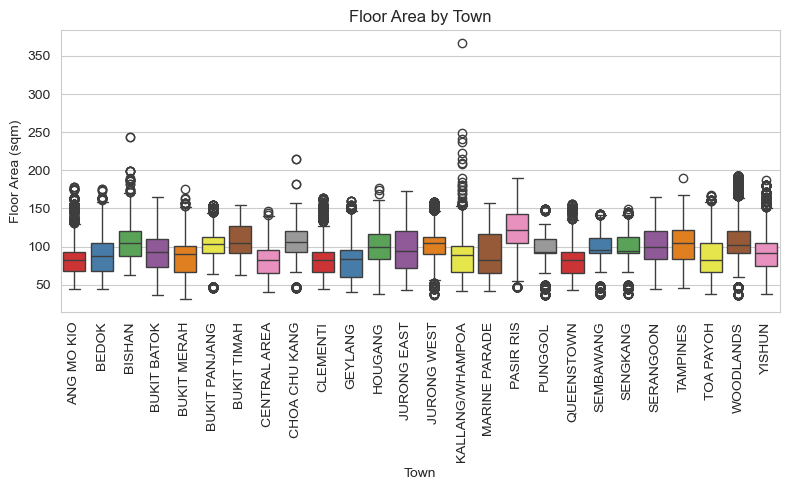

In [172]:
fig, ax = plt.subplots(figsize=(8,5))  

sns.boxplot(data=df, x='town', y='floor_area_sqm', hue='town', palette='Set1')

ax.set_title('Floor Area by Town')
ax.set_xlabel('Town')
ax.set_ylabel('Floor Area (sqm)')
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation = 90)

plt.tight_layout()
plt.show()

**The chart shows that some town contains more outliers than other town in terms of floor area. KALLANG/WHAMPOA has many outliers that goes beyond 350 sqm. These are the 3 Room terrace that we discovered earlier.**

In [173]:
town_breakdown[['resale_price']].describe()

resale_price                                          \
                       count           mean            std       min   
town                                                                   
ANG MO KIO            8572.0  471047.921577  201726.112754  174000.0   
BEDOK                10935.0  472782.006401  176413.412390  180000.0   
BISHAN                3694.0  700148.874055  216347.604177  210000.0   
BUKIT BATOK           8590.0  491515.941386  172979.962001  208000.0   
BUKIT MERAH           8016.0  629222.228498  243195.677879  157000.0   
BUKIT PANJANG         7516.0  493391.797722  138573.678693  200000.0   
BUKIT TIMAH            514.0  765734.746848  249745.186463  300000.0   
CENTRAL AREA          1646.0  681057.826707  312098.300098  200000.0   
CHOA CHU KANG         9502.0  481518.637254  118499.366012  200000.0   
CLEMENTI              4642.0  544054.590047  222612.432650  205000.0   
GEYLANG               5136.0  498128.517091  222543.804862  150000.0   
HOUGANG              10528.0  511844.879704  164473.170068  195000.0   
JURONG EAST           4274.0  467077.466542  159117.214764  200000.0   
JURONG WEST          13868.0  455117.834314  128827.540089  175000.0   
KALLANG/WHAMPOA       6391.0  582015.960182  244292.118935  185000.0   
MARINE PARADE         1281.0  552734.599438  195852.159057  180000.0   
PASIR RIS             6041.0  574050.909929  139555.607823  180000.0   
PUNGGOL              15295.0  534502.481057  123368.329998  225000.0   
QUEENSTOWN            5718.0  628486.981770  258459.604860  182000.0   
SEMBAWANG             6176.0  489789.390848  127791.624304  195000.0   
SENGKANG             17179.0  517602.993634  122106.983493  196000.0   
SERANGOON             3734.0  555512.273937  191901.022850  170000.0   
TAMPINES             14233.0  550921.732585  157168.975018  150000.0   
TOA PAYOH             6642.0  553911.383282  274259.891017  140000.0   
WOODLANDS            14868.0  469841.579785  146372.461594  150000.0   
YISHUN               14284.0  442501.867597  135023.124881  190000.0   

                                                          
                      25%       50%       75%        max  
town                                                      
ANG MO KIO       325291.0  405000.0  568000.0  1500000.0  
BEDOK            338000.0  420000.0  590000.0  1270000.0  
BISHAN           543916.0  680000.0  832000.0  1568000.0  
BUKIT BATOK      355000.0  460000.0  620000.0  1088000.0  
BUKIT MERAH      400000.0  648000.0  818000.0  1588000.0  
BUKIT PANJANG    395666.0  472000.0  575000.0  1100000.0  
BUKIT TIMAH      570000.0  753944.0  923835.5  1501555.0  
CENTRAL AREA     435000.0  550000.0  940000.0  1580000.0  
CHOA CHU KANG    390000.0  480000.0  555000.0   980000.0  
CLEMENTI         362597.0  485000.0  708972.0  1400000.0  
GEYLANG          310000.0  445000.0  670000.0  1310000.0  
HOUGANG          385000.0  480000.0  620000.0  1280000.0  
JURONG EAST      350000.0  438000.0  560000.0  1186800.0  
JURONG WEST      360000.0  450000.0  540000.0   980000.0  
KALLANG/WHAMPOA  362000.0  555000.0  770000.0  1568000.0  
MARINE PARADE    405000.0  485000.0  695000.0  1380000.0  
PASIR RIS        470000.0  555000.0  660000.0  1238000.0  
PUNGGOL          445000.0  520000.0  615000.0  1230000.0  
QUEENSTOWN       375000.0  650000.0  830000.0  1658888.0  
SEMBAWANG        381000.0  480000.0  580000.0   878000.0  
SENGKANG         428000.0  505000.0  595000.0  1058000.0  
SERANGOON        402625.0  520000.0  672000.0  1268000.0  
TAMPINES         430000.0  530000.0  650000.0  1200000.0  
TOA PAYOH        318000.0  475000.0  765000.0  1600000.0  
WOODLANDS        360000.0  445000.0  555000.0  1190000.0  
YISHUN           340000.0  420000.0  525000.0  1280000.0

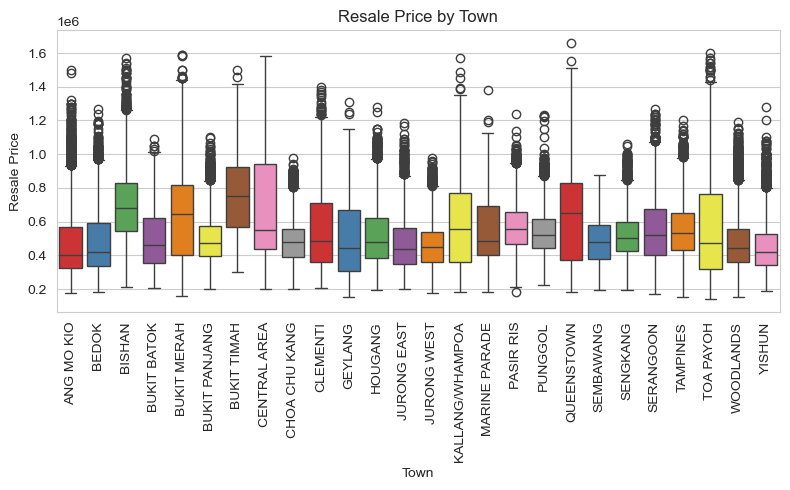

In [174]:
fig, ax = plt.subplots(figsize=(8,5))  

sns.boxplot(data=df, x='town', y='resale_price', hue='town', palette='Set1')

ax.set_title('Resale Price by Town')
ax.set_xlabel('Town')
ax.set_ylabel('Resale Price')
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation = 90)

plt.tight_layout()
plt.show()

**Some town command higher median selling price compared to other town. Those town that are nearer to the central location are more skewed to the right.**

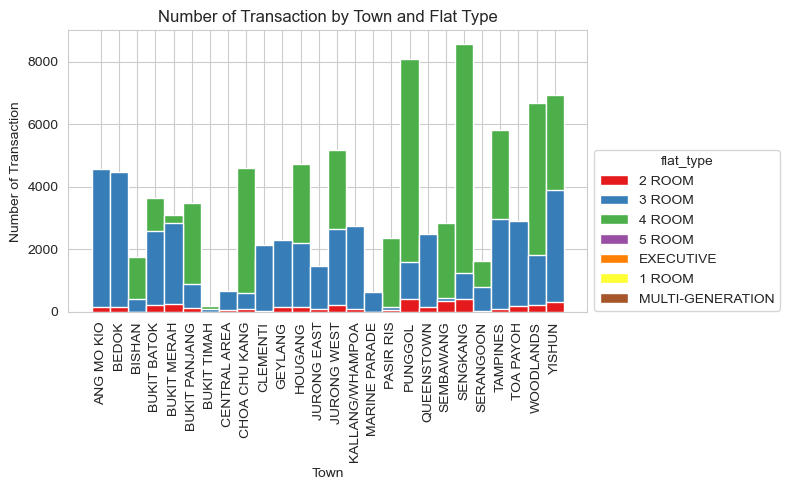

In [175]:
fig, ax = plt.subplots(figsize=(8,5))  

f1 = sns.histplot(data=df, x='town', hue='flat_type', palette='Set1', alpha=1)
sns.move_legend(f1, "upper left", bbox_to_anchor=(1, 0.6))

ax.set_title('Number of Transaction by Town and Flat Type')
ax.set_xlabel('Town')
ax.set_ylabel('Number of Transaction')
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation = 90)

plt.tight_layout()
plt.show()


**Most transactions are 3-room and 4-room.**

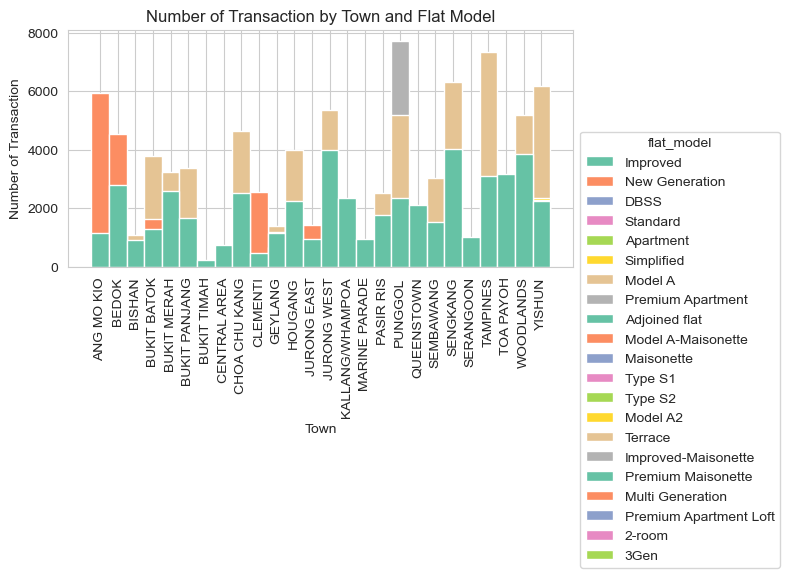

In [176]:
fig, ax = plt.subplots(figsize=(8,5))  

f1 = sns.histplot(data=df, x='town', hue='flat_model', palette='Set2', alpha=1)
sns.move_legend(f1, "upper left", bbox_to_anchor=(1, 0.6))

ax.set_title('Number of Transaction by Town and Flat Model')
ax.set_xlabel('Town')
ax.set_ylabel('Number of Transaction')
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation = 90)

plt.tight_layout()
plt.show()

**Some model is only available at some town or there are no sales for certain models?**

In [177]:
town_type_breakdown = df[['town', 'flat_type', 'floor_area_sqm', 'resale_price']].groupby(['town', 'flat_type'])
print(town_type_breakdown[['floor_area_sqm']].describe().to_string())



                                 floor_area_sqm                                                           
                                          count        mean        std    min    25%    50%     75%    max
town            flat_type                                                                                 
ANG MO KIO      2 ROOM                    157.0   44.273885   0.636612   44.0   44.0   44.0   44.00   49.0
                3 ROOM                   4573.0   70.996720   5.952182   60.0   67.0   68.0   73.00   89.0
                4 ROOM                   2440.0   92.970082   3.684393   81.0   91.0   92.0   93.25  113.0
                5 ROOM                   1276.0  118.864420   7.198668  110.0  112.0  119.0  121.00  150.0
                EXECUTIVE                 126.0  155.531746   9.120251  142.0  148.0  154.0  163.00  178.0
BEDOK           2 ROOM                    147.0   45.068027   0.816440   44.0   45.0   45.0   45.00   47.0
                3 ROOM               

In [106]:
print(town_type_breakdown[['resale_price']].describe().to_string())

                                 resale_price                                                                                     
                                        count          mean            std       min          25%        50%        75%        max
town            flat_type                                                                                                         
ANG MO KIO      2 ROOM                  157.0  2.532270e+05   44794.230585  178000.0  210000.0000   245000.0   293000.0   341000.0
                3 ROOM                 4573.0  3.487190e+05   79037.246863  174000.0  290000.0000   340000.0   390000.0   794500.0
                4 ROOM                 2440.0  5.486457e+05  169460.793750  275000.0  420000.0000   490000.0   635020.0  1128888.0
                5 ROOM                 1276.0  7.429172e+05  168757.338984  420000.0  615000.0000   719444.5   840000.0  1500000.0
                EXECUTIVE               126.0  9.263192e+05  142988.022656  623000.

**If we breakdown the flat by town and flat type, the dispersion of the floor area and resale price is still wide. But the dispersion of floor area and resale price is narrower compared to just using one classification category. This is due to different flat model.**

In [109]:
full_breakdown = df[['town', 'flat_type', 'flat_model', 'floor_area_sqm', 'resale_price']].groupby(['town', 'flat_type', 'flat_model'])


In [110]:
print(full_breakdown[['floor_area_sqm']].describe().to_string())

                                                        floor_area_sqm                                                            
                                                                 count        mean        std    min     25%    50%     75%    max
town            flat_type        flat_model                                                                                       
ANG MO KIO      2 ROOM           Improved                        157.0   44.273885   0.636612   44.0   44.00   44.0   44.00   49.0
                3 ROOM           Improved                         82.0   61.524390   3.092107   60.0   60.00   60.0   61.00   69.0
                                 Model A                         196.0   68.683673   1.232857   67.0   68.00   68.0   70.00   70.0
                                 New Generation                 4295.0   71.283120   5.952571   67.0   67.00   68.0   73.00   89.0
                4 ROOM           DBSS                            108.0   90.490741 

In [ ]:
print(full_breakdown[['resale_price']].describe().to_string())

                                                        resale_price                                                                                  
                                                               count          mean            std       min       25%       50%        75%         max
town_name       flat_type        flatm_name                                                                                                           
ANG MO KIO      2 ROOM           Improved                       73.0  2.317055e+05   20577.400565  185000.0  218000.0  233000.0   249000.0   272000.00
                3 ROOM           Improved                       36.0  2.701962e+05   23954.129688  230000.0  257250.0  274000.0   280000.0   330000.00
                                 Model A                        45.0  4.576197e+05   28938.754065  380000.0  445000.0  460000.0   475000.0   519000.00
                                 New Generation               2224.0  3.097342e+05   39097.977

**If we breakdown the flat by town, flat type and flat model, for some location, there is no dispersion. However for some location, the dispersion of the floor area and resale price is much narrower compared to previous grouping and classification. However, some flat model still present a slightly wide dispersion in terms of flat model and resale price.**

In [111]:
group_flat_model_sqm = df[['flat_type', 'flat_model', 'floor_area_sqm', 'resale_price']].groupby(['flat_type', 'flat_model', 'floor_area_sqm']).mean()
print(group_flat_model_sqm.to_string())

                                                        resale_price
flat_type        flat_model             floor_area_sqm              
1 ROOM           Improved               31.0            2.098462e+05
2 ROOM           2-room                 37.0            3.093333e+05
                                        38.0            3.459030e+05
                                        40.0            2.650440e+05
                                        42.0            2.950000e+05
                                        43.0            2.990000e+05
                                        44.0            2.976667e+05
                                        46.0            2.870000e+05
                                        47.0            3.494390e+05
                                        48.0            3.761232e+05
                                        55.0            3.012500e+05
                 DBSS                   50.0            3.675000e+05
                 Improved         

**Even if we fine tuned the flat selection by model type, there are many variation in terms of floor area. For example, in a 5 Room Model A flat we have a range of 129 sqm to 157 sqm. This proves that if we narrow our selection to model type, we may not have accurate prediction without the indication of floor area.**

**Our initial conclusion is that the best feature to predict housing price is the floor area. However, we will keep the flat type and flat model to provide us segmentation information so that we can improve the prediction of resale price.**

### Selected Break Down of Resale Price

#### 4 ROOM with Model A by Town

In [112]:
four_model_A = df.loc[(df['flat_type']=='4 ROOM') & (df['flat_model']=='Model A'),['town', 'floor_area_sqm', 'resale_price']]

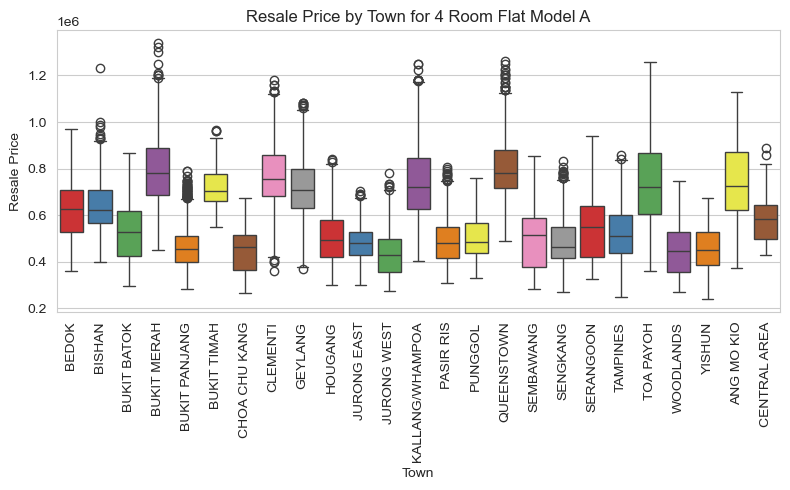

In [114]:
fig, ax = plt.subplots(figsize=(8,5))  

sns.boxplot(data=four_model_A, x='town', y='resale_price', hue='town', palette='Set1')

ax.set_title('Resale Price by Town for 4 Room Flat Model A')
ax.set_xlabel('Town')
ax.set_ylabel('Resale Price')
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation = 90)

plt.tight_layout()
plt.show()

**The more we breakdown by town, flat type and flat model, the less dispersion is the resale price. However, it is clear that not every town command the same resale price for the same type of flat with the same model.**

### Remaining Lease

In [115]:
df.remaining_lease.unique()

array(['61 years 04 months', '60 years 07 months', '62 years 05 months',
       '62 years 01 month', '63 years', '61 years 06 months',
       '58 years 04 months', '59 years 08 months', '59 years 06 months',
       '60 years', '62 years 08 months', '61 years', '60 years 10 months',
       '59 years 03 months', '61 years 05 months', '60 years 04 months',
       '62 years', '60 years 03 months', '63 years 09 months',
       '61 years 01 month', '61 years 10 months', '58 years 06 months',
       '59 years 04 months', '62 years 11 months', '60 years 08 months',
       '93 years 08 months', '93 years 07 months', '60 years 01 month',
       '94 years 08 months', '78 years 04 months', '60 years 06 months',
       '62 years 06 months', '58 years', '70 years 08 months',
       '63 years 04 months', '63 years 06 months', '67 years 07 months',
       '61 years 07 months', '68 years 02 months', '68 years 03 months',
       '56 years', '67 years 09 months', '67 years 05 months',
       '63 years 07

**Remaining lease is either in year or in year and month. We assume numbers without indicating month or year belongs to year.** 

In [116]:
df.remaining_lease.isnull().sum()

0

**We need to convert the remaining lease to months as a standard indicator.**

In [117]:
def convert_lease_to_month(lease):
    """
    Convert remaining lease period from string to total number of months.
    Args:
        remaining_lease in (str)

    Returns: 
        integer

    Example:
        convert_lease_to_month('07 TO 09') -> 8.0  
    """
    str_list = lease.split(' ')
    if ('months' in str_list) | ('month' in str_list):
        year = int(str_list[0])
        month = int(str_list[2])
        t_month = (year * 12) + month 
    elif ('years' in str_list) & (('months' not in str_list) | ('month' not in str_list)):
        year = int(str_list[0])
        t_month = (year * 12)
    else:
        year = int(str_list[0])
        t_month = (year * 12)        
    return t_month

In [118]:
df['remaining_lease_by_month'] = df.remaining_lease.apply(convert_lease_to_month)

### Correlation Analysis

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209275 entries, 0 to 209578
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   month                     209275 non-null  object 
 1   town                      209275 non-null  object 
 2   flat_type                 209275 non-null  object 
 3   block                     209275 non-null  object 
 4   street_name               209275 non-null  object 
 5   storey_range              209275 non-null  object 
 6   floor_area_sqm            209275 non-null  float64
 7   flat_model                209275 non-null  object 
 8   lease_commence_date       209275 non-null  int64  
 9   remaining_lease           209275 non-null  object 
 10  resale_price              209275 non-null  float64
 11  remaining_lease_by_month  209275 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 20.8+ MB


In [121]:
corr_column = df[['floor_area_sqm', 'lease_commence_date', 'remaining_lease_by_month', 'resale_price']]
corr_matrix_pear = corr_column.corr(method='pearson')
corr_matrix_pear

,floor_area_sqm,lease_commence_date,remaining_lease_by_month,resale_price
floor_area_sqm,1.000000,0.102512,0.111795,0.580096
lease_commence_date,0.102512,1.000000,0.986011,0.369525
remaining_lease_by_month,0.111795,0.986011,1.000000,0.309917
resale_price,0.580096,0.369525,0.309917,1.000000


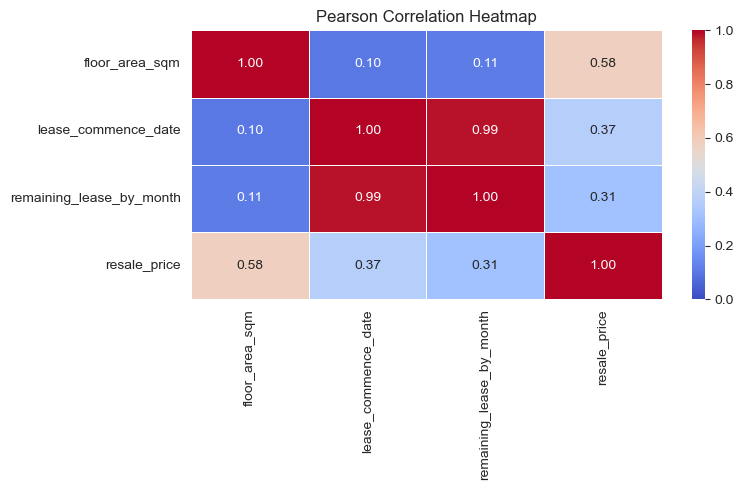

In [122]:
fig, ax = plt.subplots(figsize=(8,5))  

sns.heatmap(corr_matrix_pear, annot=True, cmap='coolwarm', vmin=0, center=0.5, vmax=1, linewidths=0.5, fmt=".2f")

ax.set_title('Pearson Correlation Heatmap')

plt.tight_layout()
plt.show()

**There is a strong correlation between floor area and resale price. There is also moderate correlation between resale price and lease commence date which in turn indicating the age of the flat. The features, lease commence date and remaining lease in months are 100% correlated. Therefore, it is suggested that we drop one of the feature.** 

In [123]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,remaining_lease_by_month
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,736
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,727
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,749
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,745
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,749


**We will convert the storey range to numeric and the take the middle floor indicated by the storey range. For example, if storey range is from 7th floor to 9th floor. We will take the middle floor, 8th floor as the indicator.**

In [124]:
def convert_storey_range(storey_range):
    """
    Convert storey range to the numerical average.
    Args:
        storey_range in (str)

    Returns: 
        float

    Example:
        convert_storey_range('07 TO 09') -> 8.0 
    """

    low, high = storey_range.split(' TO ')
    average = (int(low) + int(high)) / 2
    return average

In [125]:
df.storey_range = df.storey_range.apply(convert_storey_range)

In [126]:
df.storey_range

0         11.0
1          2.0
2          2.0
3          5.0
4          2.0
          ... 
209574    11.0
209575     8.0
209576     5.0
209577     5.0
209578     5.0
Name: storey_range, Length: 209275, dtype: float64

In [127]:
spearman_col = df[['storey_range', 'floor_area_sqm', 'lease_commence_date', 'remaining_lease_by_month', 'resale_price']]
spearman_corr = spearman_col.corr(method='spearman')

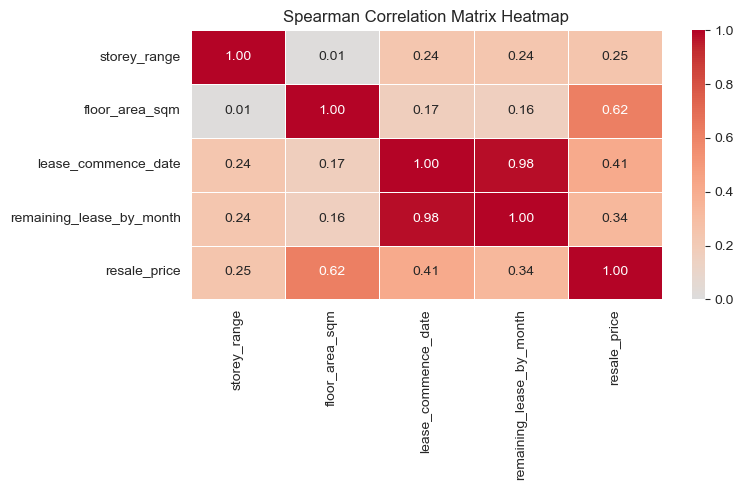

In [128]:
fig, ax = plt.subplots(figsize=(8,5))  

sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', vmin=0, center=0, vmax=1, linewidths=0.5, fmt=".2f")

ax.set_title('Spearman Correlation Matrix Heatmap')

plt.tight_layout()
plt.show()

**There is strong correlation between floor area and resale price. Moderate correlation between age of the flat and the resale price. Moderate to weak correlation between height of the flat and resale price. Similarly, there is high correlation between lease commence date and remaining lease in months. Remaining lease in months are slightly more correlated to the resale price, as it is more granular. Therefore, we can consider dropping lease commence date if necessary.**

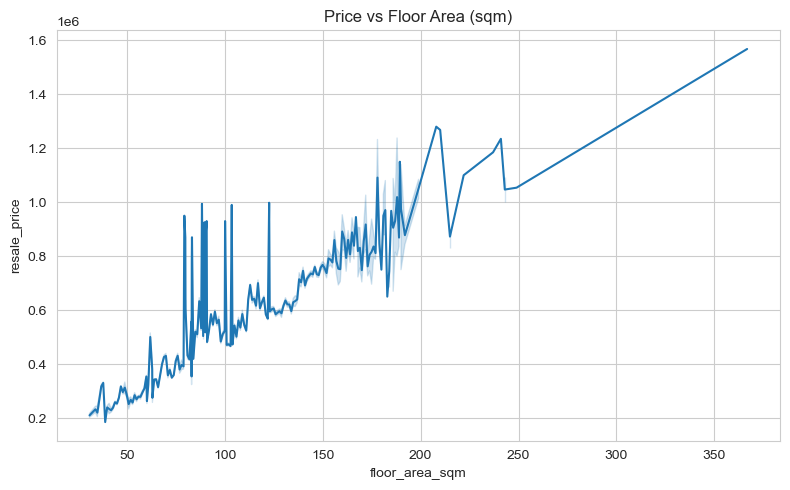

In [178]:
fig, ax = plt.subplots(figsize=(8,5))  

sns.lineplot(df, x = df.floor_area_sqm, y=df.resale_price)

ax.set_title('Price vs Floor Area (sqm)')

plt.tight_layout()
plt.show()

**There is a linear trend in terms of resale price and its biggest contributor.**

## EDA Findings

**Resale Price**
- **The mean of resale price is around $438K and the median is around 408K. Resale prices range from $160K to $1.2M. Based on the chart, the distribution of the resale price skewed to the right. This means that there are expensive flat that extends to the right. Lower priced flats are more concentrated. The skewness will cause the model to over-estimate the normal range houses. Either we use transformation on the target or we use other model that are robust to the skewness.**

**Feature Analysis**
- **Top 3 town with the highest turn over is Jurong West, Woodlands and Sengkang. The most popular resale flat type is 4 ROOM, follow by 3 ROOM and 5 ROOM flat. Top 3 model with the most transaction is Model A, Improved and New Generation.**
- **For 3 ROOM flats, there are outliers. These outliers belongs to old 3 ROOM flat that comes with a Terrace model. These flats are built between 1968 and 1972. The floor area ranges from 78 sqm to 880 sqm. Therefore, flat type is not good enough to differentiate the resale price. Flat model also plays an important differentiator.**
- **Besides 3 ROOM flat, other flat type also contains Terrace model. To get a more accurate prediction, flat type and flat model must be used together.**
- **Some flat type such as 3 ROOM is only available at older towns. Some model such as 'New Generation' is only available at some town.**
- **For the same flat type with the same model and similar floor area, not every town command the similar resale price range. Some town has higher median resale price compared to other town. This proves that location matters.**
- **If we breakdown the flat by town, flat type and flat model, for some location, there is no dispersion. However for some location, the dispersion of the floor area and resale price is much narrower compared to fewer grouping. However, some flat model still present a slightly wide dispersion in terms of flat model and resale price.**
- **Even if we fine tuned the flat selection by model type, there are many variation in terms of floor area. For example, in a 5 Room Model A flat we have a range of floor area between 129 sqm to 157 sqm. This proves that if we narrow our selection to flat type and model type, we may not have accurate prediction without the indication of floor area.**

**Feature Analysis Conclusion** 
- **Our initial conclusion is that the best feature to predict housing price is the floor area. However, we will can keep the flat type and flat model to provide us segmentation information so that we can improve the prediction of resale price. Location information is important to differentiate the price in different town.**

**Correlation Analysis**
- **For Pearson correlation analysis, there is a strong correlation between floor area and resale price. There is also moderate correlation between resale price and lease commence date which in turn indicating the age of the flat. The features, lease commence date and remaining lease in months are highly correlated. Therefore, it is suggested that we either use Ridge Regression to reduce the impact of multicollinearity or we drop one of the feature.** 
- **For Spearman Correlation Analysis, there is strong correlation between floor area and resale price. Moderate correlation between age of the flat and the resale price. Moderate to weak correlation between height of the flat and resale price. Similarly, there is high correlation between lease commence date and remaining lease in months. Remaining lease in months are slightly more correlated to the resale price, as it is more granular. Therefore, we can consider dropping lease commence date if necessary.**
- **Additional chart show a linear relation between hdb resale price and the floor area.**

### Conclusion

- **Floor area is the most important feature follow by age of the flat and the height of the flat.**
- **For the age of the flat, we will drop the column `lease_commence_date` and keep `remaining_lease_by_month`.** 
- **Other factor that are not in correlation analysis such as location information (`town_name`) also provide important signal on pricing prediction.**
- **We will keep the `flat_type` and `flatm_name` (flat model) to improve the prediction by providing segmental information.**
- **Lastly, we will keep transaction year and month, to help with the resale price prediction.**

## Data Cleaning

In [179]:
# Load the dataset
df = pd.read_csv('./data/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv')

In [180]:
len(df)

209579

### Removing Duplicates

In [181]:
# Remove duplicated items
df.drop_duplicates(inplace=True)

In [182]:
df.duplicated().sum()

0

In [183]:
len(df)

209275

## Feature Engineering

### Feature Engineering - Splitting Transaction Column 'month' to Year and Month

In [188]:
# Splitting column 'month' into year and month
df['year_month'] = pd.to_datetime(df.month, format='%Y-%m')
df['transac_year'] = df.year_month.dt.year
df['transac_month'] = df.year_month.dt.month

In [189]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year_month,transac_year,transac_month
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,2017-01-01,2017,1
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,2017-01-01,2017,1
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,2017-01-01,2017,1
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,2017-01-01,2017,1
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,2017-01-01,2017,1


### Feature Engineering - Convert 'remaining_lease' to remaining_lease_months'

In [190]:
def convert_lease_to_month(lease: str) -> int:
    """
    Convert remaining lease period from string to total number of months.
    Args:
        remaining_lease in (str)

    Returns: 
        integer

    Example:
        convert_lease_to_month('07 TO 09') -> 8.0  
    """
    str_list = lease.split(' ')
    if ('months' in str_list) | ('month' in str_list):
        year = int(str_list[0])
        month = int(str_list[2])
        total_month = (year * 12) + month 
    elif ('years' in str_list) & (('months' not in str_list) | ('month' not in str_list)):
        year = int(str_list[0])
        total_month = (year * 12)
    else:
        year = int(str_list[0])
        total_month = (year * 12)        
    return total_month

In [191]:
# Convert column remaining lease to remaining lease by  months
df['remaining_lease_by_months'] = df.remaining_lease.apply(convert_lease_to_month)


In [192]:

df[['remaining_lease', 'remaining_lease_by_months']].sample(10)

,remaining_lease,remaining_lease_by_months
206620,88 years 02 months,1058
17143,74 years 06 months,894
10408,74 years 03 months,891
61934,67 years 11 months,815
22831,59 years 01 month,709
4997,77 years 04 months,928
42241,72 years 04 months,868
58578,62 years 10 months,754
126381,62 years 04 months,748
137867,64 years 01 month,769


### Feature Engineering - 'storey_range'

In [193]:
def convert_storey_range(storey_range: str) -> float:
    """
    Convert storey range to the numerical average.
    Args:
        storey_range in (str)

    Returns: 
        float

    Example:
        convert_storey_range('07 TO 09') -> 8.0 
    """

    low, high = storey_range.split(' TO ')
    average = (int(low) + int(high)) / 2
    return average

In [194]:
# convert storey range to number middle value
df.storey_range = df.storey_range.apply(convert_storey_range)

In [195]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year_month,transac_year,transac_month,remaining_lease_by_months
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,11.0,44.0,Improved,1979,61 years 04 months,232000.0,2017-01-01,2017,1,736
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,2.0,67.0,New Generation,1978,60 years 07 months,250000.0,2017-01-01,2017,1,727
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,2.0,67.0,New Generation,1980,62 years 05 months,262000.0,2017-01-01,2017,1,749
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,5.0,68.0,New Generation,1980,62 years 01 month,265000.0,2017-01-01,2017,1,745
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,2.0,67.0,New Generation,1980,62 years 05 months,265000.0,2017-01-01,2017,1,749


### Dropping Irrelevant Columns

In [196]:
# Dropping irrelevant columns for machine learning preparation
irrelevant_columns = ['month', 'block', 'street_name', 'remaining_lease', 'year_month', 'lease_commence_date']
df.drop(columns = irrelevant_columns, inplace=True)

In [197]:
df.head()

,town,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,transac_year,transac_month,remaining_lease_by_months
0,ANG MO KIO,2 ROOM,11.0,44.0,Improved,232000.0,2017,1,736
1,ANG MO KIO,3 ROOM,2.0,67.0,New Generation,250000.0,2017,1,727
2,ANG MO KIO,3 ROOM,2.0,67.0,New Generation,262000.0,2017,1,749
3,ANG MO KIO,3 ROOM,5.0,68.0,New Generation,265000.0,2017,1,745
4,ANG MO KIO,3 ROOM,2.0,67.0,New Generation,265000.0,2017,1,749


In [198]:
df.columns

Index(['town', 'flat_type', 'storey_range', 'floor_area_sqm', 'flat_model',
       'resale_price', 'transac_year', 'transac_month',
       'remaining_lease_by_months'],
      dtype='object')

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209275 entries, 0 to 209578
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   town                       209275 non-null  object 
 1   flat_type                  209275 non-null  object 
 2   storey_range               209275 non-null  float64
 3   floor_area_sqm             209275 non-null  float64
 4   flat_model                 209275 non-null  object 
 5   resale_price               209275 non-null  float64
 6   transac_year               209275 non-null  int32  
 7   transac_month              209275 non-null  int32  
 8   remaining_lease_by_months  209275 non-null  int64  
dtypes: float64(3), int32(2), int64(1), object(3)
memory usage: 14.4+ MB


## Data Split

In [200]:
# Separate the data into features and target
X = df.drop(columns='resale_price')
y = df['resale_price']

In [201]:
X

,town,flat_type,storey_range,floor_area_sqm,flat_model,transac_year,transac_month,remaining_lease_by_months
0,ANG MO KIO,2 ROOM,11.0,44.0,Improved,2017,1,736
1,ANG MO KIO,3 ROOM,2.0,67.0,New Generation,2017,1,727
2,ANG MO KIO,3 ROOM,2.0,67.0,New Generation,2017,1,749
3,ANG MO KIO,3 ROOM,5.0,68.0,New Generation,2017,1,745
4,ANG MO KIO,3 ROOM,2.0,67.0,New Generation,2017,1,749
...,...,...,...,...,...,...,...,...
209574,YISHUN,EXECUTIVE,11.0,146.0,Maisonette,2025,2,744
209575,YISHUN,EXECUTIVE,8.0,142.0,Apartment,2025,4,741
209576,YISHUN,EXECUTIVE,5.0,146.0,Maisonette,2025,4,741
209577,YISHUN,EXECUTIVE,5.0,142.0,Apartment,2025,5,741


In [202]:
y

0          232000.0
1          250000.0
2          262000.0
3          265000.0
4          265000.0
            ...    
209574    1100888.0
209575     988000.0
209576     975000.0
209577    1000000.0
209578     945000.0
Name: resale_price, Length: 209275, dtype: float64

In [203]:
# Split the data into training (80%) and test-validation (20%) sets
X_train, X_validation_and_test, y_train, y_validation_and_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the test-validation set (20%) into validation (10%) and test (10%) sets
X_val, X_test, y_val, y_test = train_test_split(X_validation_and_test, y_validation_and_test, test_size=0.5, random_state=42)

In [204]:
# Display the shapes of the splits to verify
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (167420, 8) (167420,)
Validation set shape: (20927, 8) (20927,)
Test set shape: (20928, 8) (20928,)


## Setting Feature Scaling

In [205]:
df.head()

,town,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,transac_year,transac_month,remaining_lease_by_months
0,ANG MO KIO,2 ROOM,11.0,44.0,Improved,232000.0,2017,1,736
1,ANG MO KIO,3 ROOM,2.0,67.0,New Generation,250000.0,2017,1,727
2,ANG MO KIO,3 ROOM,2.0,67.0,New Generation,262000.0,2017,1,749
3,ANG MO KIO,3 ROOM,5.0,68.0,New Generation,265000.0,2017,1,745
4,ANG MO KIO,3 ROOM,2.0,67.0,New Generation,265000.0,2017,1,749


In [208]:
# Select columns that are numerical for feature scaling preparation
numerical_features = ['floor_area_sqm', 'remaining_lease_by_months', 'transac_year'] # no lease_commence_date

degree = 6  # Degree of polynomial features, can be adjusted
# Create a numerical transformer pipeline
numerical_transformer = Pipeline(steps=[
    ('polynomial_features', PolynomialFeatures(degree=degree)),  # Placeholder for polynomial features
    ('scaler', StandardScaler())
])

## Feature Encoding

In [209]:
# Select columns that need to be one-hot encoded
nominal_features = ['transac_month', 'town', 'flat_model', 'flat_type']

# Select columns that requires ordinal encoding
ordinal_features = []

# Set the criterial for ordinal encoding
# flat_type_categories = ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'MULTI-GENERATION', 'EXECUTIVE']

# Select the columns that do not required further processing 
passthrough_features = ['storey_range']

# Setting pipeline for one-hot encoding
nominal_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Setting pipeline for ordinal encoding
ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[], handle_unknown='use_encoded_value', unknown_value=-1))
])


## Preprocessor

In [210]:
# Setting preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('nom', nominal_transformer, nominal_features),
        ('ord', 'passthrough', ordinal_features),
        ('pass', 'passthrough', passthrough_features) 
    ],
    remainder='passthrough',
    n_jobs=-1
    )

In [211]:
preprocessor

ColumnTransformer(n_jobs=-1, remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('polynomial_features',
                                                  PolynomialFeatures(degree=6)),
                                                 ('scaler', StandardScaler())]),
                                 ['floor_area_sqm', 'remaining_lease_by_months',
                                  'transac_year']),
                                ('nom',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['transac_month', 'town', 'flat_model',
                                  'flat_type']),
                                ('ord', 'passthrough', []),
                                ('pass', 'passthrough', ['storey_range'])])

## Model Development

### Multivariate Linear Regression without Transformation

In [212]:
# Setting up regression pipeline
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [213]:
# Model fitting
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('polynomial_features',
                                                                   PolynomialFeatures(degree=6)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['floor_area_sqm',
                                                   'remaining_lease_by_months',
                                                   'transac_year']),
                                                 ('nom',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['transac_month', 'town',
                                                   'flat_model', 'flat_type']),
                                                 ('ord', 'passthrough', []),
                                                 ('pass', 'passthrough',
                                                  ['storey_range'])])),
                ('regressor', LinearRegression())])

In [214]:
# Prediction on validation set
y_val_pred = lr_pipeline.predict(X_val)
y_val_pred

array([725081.69384109, 722428.6785823 , 412019.92315017, ...,
       476154.30230056, 537926.00737868, 446374.10643874])

In [215]:
# Get feature names after preprocessing
feature_names = lr_pipeline.named_steps['preprocessor'].get_feature_names_out()
print(feature_names)

['num__1' 'num__floor_area_sqm' 'num__remaining_lease_by_months'
 'num__transac_year' 'num__floor_area_sqm^2'
 'num__floor_area_sqm remaining_lease_by_months'
 'num__floor_area_sqm transac_year' 'num__remaining_lease_by_months^2'
 'num__remaining_lease_by_months transac_year' 'num__transac_year^2'
 'num__floor_area_sqm^3' 'num__floor_area_sqm^2 remaining_lease_by_months'
 'num__floor_area_sqm^2 transac_year'
 'num__floor_area_sqm remaining_lease_by_months^2'
 'num__floor_area_sqm remaining_lease_by_months transac_year'
 'num__floor_area_sqm transac_year^2' 'num__remaining_lease_by_months^3'
 'num__remaining_lease_by_months^2 transac_year'
 'num__remaining_lease_by_months transac_year^2' 'num__transac_year^3'
 'num__floor_area_sqm^4' 'num__floor_area_sqm^3 remaining_lease_by_months'
 'num__floor_area_sqm^3 transac_year'
 'num__floor_area_sqm^2 remaining_lease_by_months^2'
 'num__floor_area_sqm^2 remaining_lease_by_months transac_year'
 'num__floor_area_sqm^2 transac_year^2'
 'num__floor

In [216]:
# get model coefficients
model_coefficients = lr_pipeline.named_steps['regressor'].coef_
print(model_coefficients)

[ 1.27322871e+04  3.18519940e+11 -2.66234231e+11  1.11922220e+12
  9.91777588e+10 -9.15997288e+10 -4.13096976e+11 -1.64149103e+10
  3.66387326e+11 -1.57255574e+12  1.38661207e+10  1.22677572e+11
 -2.35236666e+11  1.20547934e+11  3.93138995e+10 -2.63037973e+11
 -1.64411335e+11  1.52817757e+11  2.01660398e+11 -8.95483034e+11
 -2.83176308e+10  1.16004910e+11 -7.71424342e+10 -2.50169824e+11
 -1.45321444e+11  2.31691203e+10  3.21989086e+10 -7.54556460e+10
  8.67635683e+10  2.14854952e+11  5.89769430e+10  1.93266010e+11
 -7.80455598e+10 -2.00960445e+11  9.02937971e+11  4.42516669e+08
 -8.86440292e+08  5.63429451e+10 -4.77032579e+08 -2.28483092e+11
  1.11115571e+11  3.76051280e+09  4.92260537e+11 -7.41716035e+10
  2.62876631e+11  1.14662659e+10 -1.02559878e+11 -1.66547152e+11
  5.44110095e+10  4.22931882e+11 -1.21141243e+10 -8.28747986e+10
  7.25234776e+10 -2.25036060e+11 -3.38117187e+11  1.57469191e+12
  9.69073715e+05 -2.00485813e+05 -4.45049685e+08  1.10843400e+07
  8.65750952e+08 -2.80123

In [217]:
# Calculate regression metrics for validation set
val_mae = mean_absolute_error(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = root_mean_squared_error(y_val, y_val_pred)  
val_r2 = r2_score(y_val, y_val_pred)

# Display the metrics
print(f"Validation MAE: {val_mae}")
print(f"Validation MSE: {val_mse}")
print(f"Validation RMSE: {val_rmse}")
print(f"Validation R2: {val_r2}")

Validation MAE: 43239.21541170065
Validation MSE: 3353317665.4794197
Validation RMSE: 57907.83768609755
Validation R2: 0.8997770841392647


### Analyzing Residual

In [218]:
y_val_pred

array([725081.69384109, 722428.6785823 , 412019.92315017, ...,
       476154.30230056, 537926.00737868, 446374.10643874])

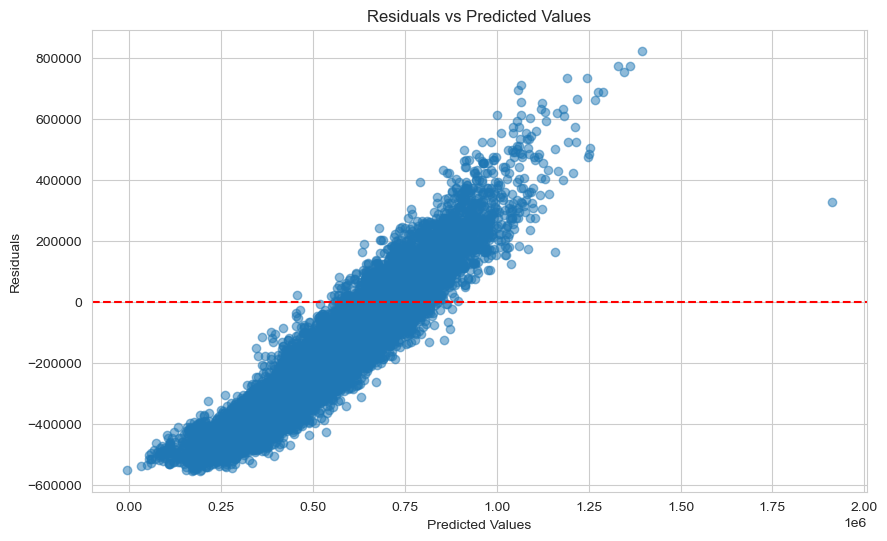

In [219]:
# Residual analysis
residuals = y_val - y_val_pred[0]
# Plotting residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_val_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

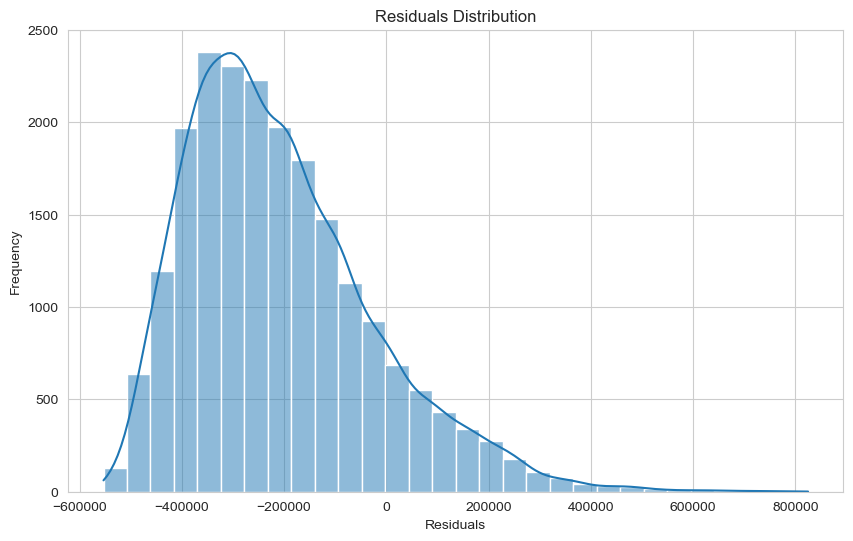

In [220]:
# residual distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

### Transformed y_train

In [221]:
pt = PowerTransformer(method='yeo-johnson')
y_train_transformed = pt.fit_transform(y_train.values.reshape(-1, 1))

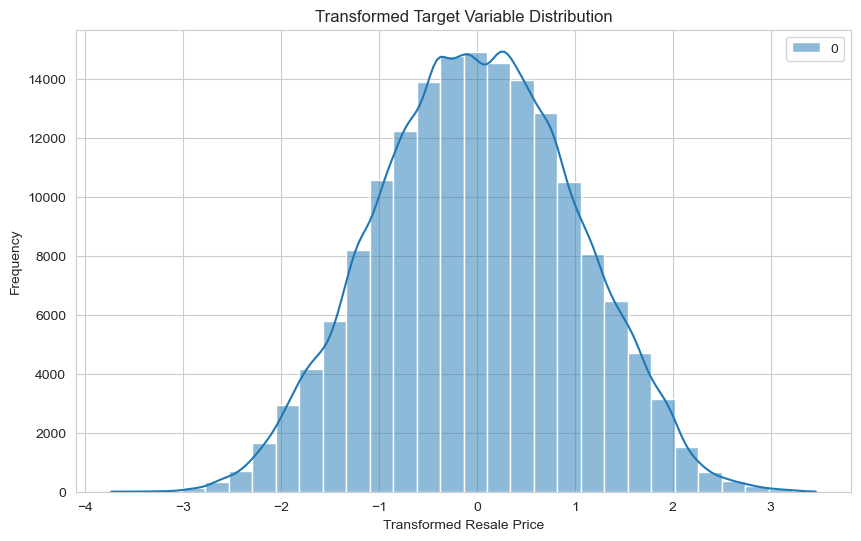

In [222]:
# Plotting the transformed target variable
plt.figure(figsize=(10, 6))
sns.histplot(y_train_transformed, kde=True, bins=30)
plt.title('Transformed Target Variable Distribution')
plt.xlabel('Transformed Resale Price')
plt.ylabel('Frequency')
plt.show()

In [223]:
# Model fitting
lr_pipeline.fit(X_train, y_train_transformed)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('polynomial_features',
                                                                   PolynomialFeatures(degree=6)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['floor_area_sqm',
                                                   'remaining_lease_by_months',
                                                   'transac_year']),
                                                 ('nom',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['transac_month', 'town',
                                                   'flat_model', 'flat_type']),
                                                 ('ord', 'passthrough', []),
                                                 ('pass', 'passthrough',
                                                  ['storey_range'])])),
                ('regressor', LinearRegression())])

In [224]:
import numpy as np

# Prediction on validation set
y_val_pred_transformed = lr_pipeline.predict(X_val)
#print(type(y_val_pred_transformed))
#print(y_val_pred_transformed.shape)
y_val_pred = pt.inverse_transform(y_val_pred_transformed.reshape(-1, 1))  # Inverse transform to get original scale
y_val_pred

array([[736960.47563352],
       [691999.06023788],
       [400927.14142476],
       ...,
       [476837.58056538],
       [535998.94728684],
       [441423.49599897]])

In [225]:
# Calculate regression metrics for validation set
val_mae_transformed = mean_absolute_error(y_val, y_val_pred)
val_mse_transformed = mean_squared_error(y_val, y_val_pred)
val_rmse_transformed = root_mean_squared_error(y_val, y_val_pred)  
val_r2_transformed = r2_score(y_val, y_val_pred)

# Display the metrics
print(f"Validation MAE (Transformed): {val_mae_transformed}")
print(f"Validation MSE (Transformed): {val_mse_transformed}")
print(f"Validation RMSE (Transformed): {val_rmse_transformed}")
print(f"Validation R2 (Transformed): {val_r2_transformed}")

Validation MAE (Transformed): 38412.09622175592
Validation MSE (Transformed): 2914205913.9150796
Validation RMSE (Transformed): 53983.38553587649
Validation R2 (Transformed): 0.9129011196529717


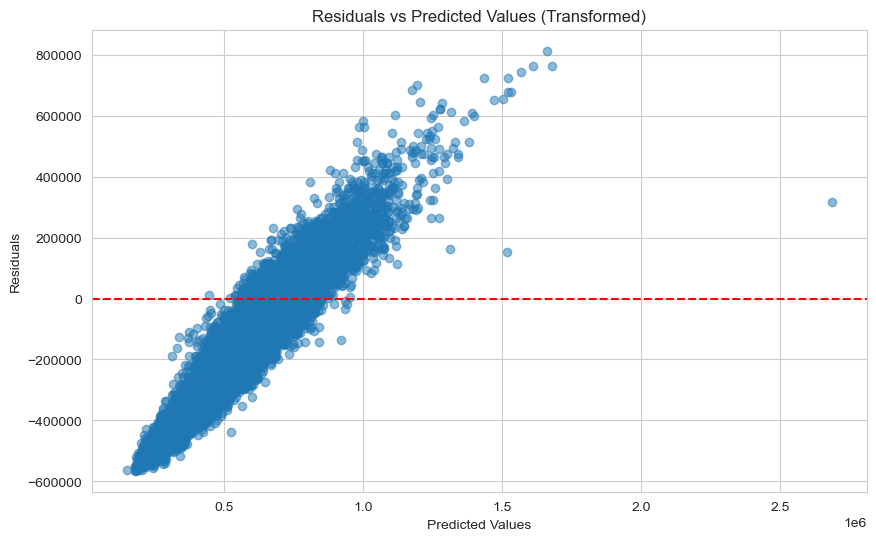

In [226]:
# Residual analysis
residuals = y_val - y_val_pred[0]

# Plotting residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_val_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values (Transformed)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

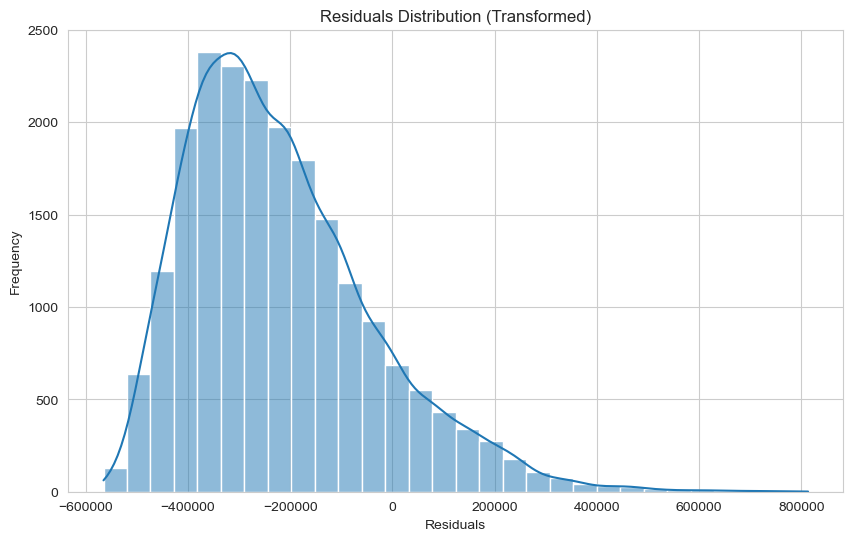

In [227]:
# Residual distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Residuals Distribution (Transformed)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [228]:
# Display the metrics
print(f"Validation MAE: {val_mae}")
print(f"Validation MSE: {val_mse}")
print(f"Validation RMSE: {val_rmse}")
print(f"Validation R2: {val_r2}")

# Display the metrics
print(f"Validation MAE (Transformed): {val_mae_transformed}")
print(f"Validation MSE (Transformed): {val_mse_transformed}")
print(f"Validation RMSE (Transformed): {val_rmse_transformed}")
print(f"Validation R2 (Transformed): {val_r2_transformed}")

Validation MAE: 43239.21541170065
Validation MSE: 3353317665.4794197
Validation RMSE: 57907.83768609755
Validation R2: 0.8997770841392647
Validation MAE (Transformed): 38412.09622175592
Validation MSE (Transformed): 2914205913.9150796
Validation RMSE (Transformed): 53983.38553587649
Validation R2 (Transformed): 0.9129011196529717


**Transformed target improve the model slightly, residual plot shows that the model failed to capture non-linearity. Will consider tree-based models. Before that, we will test with ridge regression first.**

### Ridge Regression

In [229]:
# Setting pipeline for Ridge Regression 
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1))
])
ridge_pipeline.fit(X_train, y_train)

# Predict on the validation set with Ridge Regression
y_val_pred_ridge = ridge_pipeline.predict(X_val)

# Calculate regression metrics for validation set with Ridge Regression
val_mae_ridge = mean_absolute_error(y_val, y_val_pred_ridge)
val_mse_ridge = mean_squared_error(y_val, y_val_pred_ridge)
val_rmse_ridge = root_mean_squared_error(y_val, y_val_pred_ridge)  
val_r2_ridge = r2_score(y_val, y_val_pred_ridge)

# Print the metrics for Ridge Regression
print("Ridge Regression Metrics:")
print(f"Ridge Validation MAE: {val_mae_ridge}")
print(f"Ridge Validation MSE: {val_mse_ridge}")
print(f"Ridge Validation RMSE: {val_rmse_ridge}")
print(f"Ridge Validation R²: {val_r2_ridge}")

Ridge Regression Metrics:
Ridge Validation MAE: 45725.7905799257
Ridge Validation MSE: 3644447839.513577
Ridge Validation RMSE: 60369.262373442805
Ridge Validation R²: 0.8910758760082494


### Lasso Regression

In [230]:
from sklearn.exceptions import ConvergenceWarning
ConvergenceWarning('ignore')

# Fit Lasso Regression with default alpha
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1, max_iter=1000))
])
lasso_pipeline.fit(X_train, y_train)

# Predict on the validation set with Lasso Regression
y_val_pred_lasso = lasso_pipeline.predict(X_val)

# Calculate regression metrics for validation set with Lasso Regression
val_mae_lasso = mean_absolute_error(y_val, y_val_pred_lasso)
val_mse_lasso = mean_squared_error(y_val, y_val_pred_lasso)
val_rmse_lasso = root_mean_squared_error(y_val, y_val_pred_lasso)  # RMSE is the square root of MSE
val_r2_lasso = r2_score(y_val, y_val_pred_lasso)

# Display the metrics for Lasso Regression
print("Lasso Regression Metrics:")
print(f"Lasso Validation MAE: {val_mae_lasso}")
print(f"Lasso Validation MSE: {val_mse_lasso}")
print(f"Lasso Validation RMSE: {val_rmse_lasso}")
print(f"Lasso Validation R²: {val_r2_lasso}")

/opt/miniconda3/envs/ML311/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.380e+14, tolerance: 5.575e+11
  model = cd_fast.enet_coordinate_descent(


Lasso Regression Metrics:
Lasso Validation MAE: 49192.95207896067
Lasso Validation MSE: 4190723727.339963
Lasso Validation RMSE: 64735.79942612869
Lasso Validation R²: 0.8747489521065901


In [ ]:
# compute lasso coefficients base on a range of alpha values
degree = 1
weightsLasso = None
alpha_list = np.arange(0.001,2.51,0.01)

for alpha in alpha_list:
    degree = 1
    # Create a new numerical transformer with the desired degree
    numerical_transformer_lasso = Pipeline(steps=[
        ('polynomial_features', PolynomialFeatures(degree=degree)),
        ('scaler', StandardScaler())
    ])
    # Create a new preprocessor for this iteration
    preprocessor_lasso = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer_lasso, numerical_features),
            ('nom', nominal_transformer, nominal_features),
            ('ord', 'passthrough', ordinal_features),
            ('pass', 'passthrough', passthrough_features)
        ],
        remainder='passthrough',
        n_jobs=-1
    )
    lassoPipe = Pipeline(steps=[
        ('preprocessor', preprocessor_lasso),
        ('model', Lasso(alpha=alpha, max_iter=10000))
    ])
    lassoPipe.fit(X_train, y_train)
    coef = lassoPipe.named_steps['model'].coef_
    coef = np.insert(coef, 0, alpha)
    if weightsLasso is None:
        weightsLasso = np.array(coef).reshape(1, -1)
    else:
        weightsLasso = np.vstack((weightsLasso, coef))

/opt/miniconda3/envs/ML311/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 212299665806278.38, tolerance: 557540952810.3954
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/miniconda3/envs/ML311/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 212305840045120.22, tolerance: 557540952810.3954
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/miniconda3/envs/ML311/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 212311936467955.06, tolerance: 557540952810.3954
  model = cd_fast.sparse_enet_coordinate_descent(


### Decision Tree Based Baseline Model

In [367]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('nom', nominal_transformer, nominal_features),
        ('ord', ordinal_transformer, ordinal_features),
        ('pass', 'passthrough', passthrough_features) 
    ],
    remainder='passthrough',
    n_jobs=-1
    )

In [370]:
# Decision Tree Regressor

dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])
dt_pipeline.fit(X_train, y_train)   

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('num', 'passthrough',
                                                  ['floor_area_sqm',
                                                   'remaining_lease_by_months',
                                                   'transac_year']),
                                                 ('nom',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['transac_month', 'town_name',
                                                   'flatm_name']),
                                                 ('ord',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(categories=[['1 '
                                                                                               'ROOM',
                                                                                               '2 '
                                                                                               'ROOM',
                                                                                               '3 '
                                                                                               'ROOM',
                                                                                               '4 '
                                                                                               'ROOM',
                                                                                               '5 '
                                                                                               'ROOM',
                                                                                               'MULTI-GENERATION',
                                                                                               'EXECUTIVE']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['flat_type']),
                                                 ('pass', 'passthrough',
                                                  ['storey_range'])])),
                ('regressor', DecisionTreeRegressor(random_state=42))])

In [371]:
# Predict on the validation set with Decision Tree Regressor
y_val_pred_dt = dt_pipeline.predict(X_val)  
# Calculate regression metrics for validation set with Decision Tree Regressor
val_mae_dt = mean_absolute_error(y_val, y_val_pred_dt)
val_mse_dt = mean_squared_error(y_val, y_val_pred_dt)
val_rmse_dt = root_mean_squared_error(y_val, y_val_pred_dt)
val_r2_dt = r2_score(y_val, y_val_pred_dt)  

# Display the metrics for Decision Tree Regressor
print("Decision Tree Regressor Metrics:")
print(f"Decision Tree Validation MAE: {val_mae_dt}")
print(f"Decision Tree Validation MSE: {val_mse_dt}")
print(f"Decision Tree Validation RMSE: {val_rmse_dt}")
print(f"Decision Tree Validation R²: {val_r2_dt}")

Decision Tree Regressor Metrics:
Decision Tree Validation MAE: 30920.894008998344
Decision Tree Validation MSE: 2068608721.4028287
Decision Tree Validation RMSE: 45481.96039533508
Decision Tree Validation R²: 0.9033096323652281


In [372]:
# Display the feature importances
dt_feature_importances = dt_pipeline.named_steps['regressor'].feature_importances_
dt_feature_names = preprocessor.get_feature_names_out()
dt_feature_importances_df = pd.DataFrame({'Feature': dt_feature_names, 'Importance': dt_feature_importances})
dt_feature_importances_df = dt_feature_importances_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("\nDecision Tree Feature Importances (Top 20):")
print(dt_feature_importances_df[:20])  # Display top 20 features


Decision Tree Feature Importances (Top 20):
                           Feature  Importance
0              num__floor_area_sqm    0.466051
63              pass__storey_range    0.111180
1   num__remaining_lease_by_months    0.085907
19      nom__town_name_BUKIT MERAH    0.038239
33       nom__town_name_QUEENSTOWN    0.030215
17           nom__town_name_BISHAN    0.025395
22     nom__town_name_CENTRAL AREA    0.024389
44            nom__flatm_name_DBSS    0.018256
39        nom__town_name_WOODLANDS    0.017519
23    nom__town_name_CHOA CHU KANG    0.013627
29  nom__town_name_KALLANG/WHAMPOA    0.013332
35         nom__town_name_SENGKANG    0.011364
38        nom__town_name_TOA PAYOH    0.010695
2                num__transac_year    0.009976
24         nom__town_name_CLEMENTI    0.008687
25          nom__town_name_GEYLANG    0.008478
15       nom__town_name_ANG MO KIO    0.008030
21      nom__town_name_BUKIT TIMAH    0.007979
62                  ord__flat_type    0.007259
16            n

**Using basic decision tree model without any parameter tuning, our error reduced and performance improve is much better than Linear Regression with transformed target. We will adopt tree-based model as our recommended model.**
 

### Random Forest

In [373]:
# Random Forest Regressor
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42, n_jobs=-1))
])
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('num', 'passthrough',
                                                  ['floor_area_sqm',
                                                   'remaining_lease_by_months',
                                                   'transac_year']),
                                                 ('nom',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['transac_month', 'town_name',
                                                   'flatm_name']),
                                                 ('ord',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(categories=[['1 '
                                                                                               'ROOM',
                                                                                               '2 '
                                                                                               'ROOM',
                                                                                               '3 '
                                                                                               'ROOM',
                                                                                               '4 '
                                                                                               'ROOM',
                                                                                               '5 '
                                                                                               'ROOM',
                                                                                               'MULTI-GENERATION',
                                                                                               'EXECUTIVE']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['flat_type']),
                                                 ('pass', 'passthrough',
                                                  ['storey_range'])])),
                ('regressor',
                 RandomForestRegressor(n_jobs=-1, random_state=42))])

In [374]:
# predict on the validation set with Random Forest Regressor
y_val_pred_rf = rf_pipeline.predict(X_val)

# Calculate regression metrics for validation set with Random Forest Regressor
val_mae_rf = mean_absolute_error(y_val, y_val_pred_rf)
val_mse_rf = mean_squared_error(y_val, y_val_pred_rf)
val_rmse_rf = root_mean_squared_error(y_val, y_val_pred_rf)
val_r2_rf = r2_score(y_val, y_val_pred_rf)

# Display the metrics for Random Forest Regressor
print("Random Forest Regressor Metrics:")
print(f"Random Forest Validation MAE: {val_mae_rf}")
print(f"Random Forest Validation MSE: {val_mse_rf}")
print(f"Random Forest Validation RMSE: {val_rmse_rf}")
print(f"Random Forest Validation R²: {val_r2_rf}")

Random Forest Regressor Metrics:
Random Forest Validation MAE: 23995.23522541084
Random Forest Validation MSE: 1174052514.0568702
Random Forest Validation RMSE: 34264.449711864196
Random Forest Validation R²: 0.9451227445615218


In [380]:
# Display the feature importances for Random Forest
rf_feature_importances = rf_pipeline.named_steps['regressor'].feature_importances_
rf_feature_names = preprocessor.get_feature_names_out()
rf_feature_importances_df = pd.DataFrame({'Feature': rf_feature_names, 'Importance': rf_feature_importances})
rf_feature_importances_df = rf_feature_importances_df.sort_values(by='Importance', ascending=False)
# Print the feature importances for Random Forest
print("\nRandom Forest Feature Importances (Top 20):")
print(rf_feature_importances_df[:20])  # Display top 20 features


Random Forest Feature Importances (Top 20):
                           Feature  Importance
0              num__floor_area_sqm    0.465000
63              pass__storey_range    0.115206
1   num__remaining_lease_by_months    0.086622
19      nom__town_name_BUKIT MERAH    0.038682
33       nom__town_name_QUEENSTOWN    0.029146
17           nom__town_name_BISHAN    0.025258
22     nom__town_name_CENTRAL AREA    0.020697
39        nom__town_name_WOODLANDS    0.017732
44            nom__flatm_name_DBSS    0.017186
29  nom__town_name_KALLANG/WHAMPOA    0.013705
23    nom__town_name_CHOA CHU KANG    0.013574
38        nom__town_name_TOA PAYOH    0.011313
35         nom__town_name_SENGKANG    0.010291
2                num__transac_year    0.009843
25          nom__town_name_GEYLANG    0.008726
62                  ord__flat_type    0.008653
24         nom__town_name_CLEMENTI    0.008425
21      nom__town_name_BUKIT TIMAH    0.008163
15       nom__town_name_ANG MO KIO    0.007817
16            n

### XGBoost

In [381]:
# XGBoost Regressor
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(random_state=42, n_jobs=-1, verbosity=0))
])
xgb_pipeline.fit(X_train, y_train)  

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('num', 'passthrough',
                                                  ['floor_area_sqm',
                                                   'remaining_lease_by_months',
                                                   'transac_year']),
                                                 ('nom',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['transac_month', 'town_name',
                                                   'flatm_name']),
                                                 ('ord',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=-1,
                              num_parallel_tree=None, ...))])

In [382]:
# predict on the validation set with XGBoost Regressor
y_val_pred_xgb = xgb_pipeline.predict(X_val)

# Calculate regression metrics for validation set with XGBoost Regressor
val_mae_xgb = mean_absolute_error(y_val, y_val_pred_xgb)
val_mse_xgb = mean_squared_error(y_val, y_val_pred_xgb)
val_rmse_xgb = root_mean_squared_error(y_val, y_val_pred_xgb)
val_r2_xgb = r2_score(y_val, y_val_pred_xgb)

# Display the metrics for XGBoost Regressor
print("XGBoost Regressor Metrics:")
print(f"XGBoost Validation MAE: {val_mae_xgb}")
print(f"XGBoost Validation MSE: {val_mse_xgb}")
print(f"XGBoost Validation RMSE: {val_rmse_xgb}")
print(f"XGBoost Validation R²: {val_r2_xgb}")

XGBoost Regressor Metrics:
XGBoost Validation MAE: 25707.80197230938
XGBoost Validation MSE: 1290797136.294029
XGBoost Validation RMSE: 35927.66533319454
XGBoost Validation R²: 0.9396658979734254


In [383]:
# Display the feature importances of XGBoost
xgb_feature_importances = xgb_pipeline.named_steps['regressor'].feature_importances_
xgb_feature_names = preprocessor.get_feature_names_out()
xgb_feature_importances_df = pd.DataFrame({'Feature': xgb_feature_names, 'Importance': xgb_feature_importances})
xgb_feature_importances_df = xgb_feature_importances_df.sort_values(by='Importance', ascending=False)

# Print the feature importances of XGBoost
print("\nXGBoost Feature Importances (Top 20):")
print(xgb_feature_importances_df[:20])  # Display top 20 features   


XGBoost Feature Importances (Top 20):
                           Feature  Importance
62                  ord__flat_type    0.209007
17           nom__town_name_BISHAN    0.075604
33       nom__town_name_QUEENSTOWN    0.064459
22     nom__town_name_CENTRAL AREA    0.063782
23    nom__town_name_CHOA CHU KANG    0.059339
19      nom__town_name_BUKIT MERAH    0.056420
39        nom__town_name_WOODLANDS    0.042678
21      nom__town_name_BUKIT TIMAH    0.038536
29  nom__town_name_KALLANG/WHAMPOA    0.030337
44            nom__flatm_name_DBSS    0.026369
24         nom__town_name_CLEMENTI    0.026228
34        nom__town_name_SEMBAWANG    0.025230
38        nom__town_name_TOA PAYOH    0.021939
30    nom__town_name_MARINE PARADE    0.021753
40           nom__town_name_YISHUN    0.020711
59         nom__flatm_name_Terrace    0.019940
0              num__floor_area_sqm    0.019388
35         nom__town_name_SENGKANG    0.018746
28      nom__town_name_JURONG WEST    0.015737
15       nom__town_na

### LightGBM

In [384]:
# LightGBM Regressor
lgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', lgb.LGBMRegressor(random_state=42, n_jobs=-1, verbosity=-1))
])
lgb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('num', 'passthrough',
                                                  ['floor_area_sqm',
                                                   'remaining_lease_by_months',
                                                   'transac_year']),
                                                 ('nom',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['transac_month', 'town_name',
                                                   'flatm_name']),
                                                 ('ord',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(categories=[['1 '
                                                                                               'ROOM',
                                                                                               '2 '
                                                                                               'ROOM',
                                                                                               '3 '
                                                                                               'ROOM',
                                                                                               '4 '
                                                                                               'ROOM',
                                                                                               '5 '
                                                                                               'ROOM',
                                                                                               'MULTI-GENERATION',
                                                                                               'EXECUTIVE']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['flat_type']),
                                                 ('pass', 'passthrough',
                                                  ['storey_range'])])),
                ('regressor',
                 LGBMRegressor(n_jobs=-1, random_state=42, verbosity=-1))])

In [385]:
# predict on the validation set with LightGBM Regressor
y_val_pred_lgb = lgb_pipeline.predict(X_val)

# Calculate regression metrics for validation set with LightGBM Regressor
val_mae_lgb = mean_absolute_error(y_val, y_val_pred_lgb)
val_mse_lgb = mean_squared_error(y_val, y_val_pred_lgb)
val_rmse_lgb = root_mean_squared_error(y_val, y_val_pred_lgb)
val_r2_lgb = r2_score(y_val, y_val_pred_lgb)

# Display the metrics for LightGBM Regressor
print("LightGBM Regressor Metrics:")
print(f"LightGBM Validation MAE: {val_mae_lgb}")
print(f"LightGBM Validation MSE: {val_mse_lgb}")
print(f"LightGBM Validation RMSE: {val_rmse_lgb}")
print(f"LightGBM Validation R²: {val_r2_lgb}")

LightGBM Regressor Metrics:
LightGBM Validation MAE: 28765.42043420968
LightGBM Validation MSE: 1548006303.109325
LightGBM Validation RMSE: 39344.71124699386
LightGBM Validation R²: 0.9276434943931393


/opt/miniconda3/envs/hdbenv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [386]:
# Display the feature importances of LightGBM
lgb_feature_importances = lgb_pipeline.named_steps['regressor'].feature_importances_
lgb_feature_names = preprocessor.get_feature_names_out()
lgb_feature_importances_df = pd.DataFrame({'Feature': lgb_feature_names, 'Importance': lgb_feature_importances})
lgb_feature_importances_df = lgb_feature_importances_df.sort_values(by='Importance', ascending=False)
# Print the feature importances of LightGBM
print("\nLightGBM Feature Importances (Top 20):")
print(lgb_feature_importances_df[:20])  # Display top 20 features


LightGBM Feature Importances (Top 20):
                           Feature  Importance
0              num__floor_area_sqm         574
1   num__remaining_lease_by_months         536
63              pass__storey_range         174
2                num__transac_year         107
19      nom__town_name_BUKIT MERAH          94
33       nom__town_name_QUEENSTOWN          89
17           nom__town_name_BISHAN          74
38        nom__town_name_TOA PAYOH          64
39        nom__town_name_WOODLANDS          62
29  nom__town_name_KALLANG/WHAMPOA          62
24         nom__town_name_CLEMENTI          61
25          nom__town_name_GEYLANG          59
28      nom__town_name_JURONG WEST          59
22     nom__town_name_CENTRAL AREA          57
30    nom__town_name_MARINE PARADE          56
62                  ord__flat_type          53
23    nom__town_name_CHOA CHU KANG          52
21      nom__town_name_BUKIT TIMAH          48
15       nom__town_name_ANG MO KIO          47
48         nom__flat

## Hyperparameter Tuning

**Grid Search Strategy**

Our parameter fine tuning strategy will start with Random Search with wider search space, using the search result, we will fine tune the model using grid search.

### Random Search CV

In [389]:
# Define RansomizedSearchCV parameters with wide search space for Decision Tree Regressor, Random Forest Regressor, XGBoost Regressor, and LightGBM Regressor

dt_param_grid = {
    'regressor__max_depth': [None, 5, 10, 15, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['sqrt', 'log2']
}

rf_param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 5, 10, 15, 20],
    'regressor__min_samples_split': [2, 5, 7, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['auto', 'sqrt', 'log2']
}       

xgb_param_grid = {
    'regressor__n_estimators': [50, 100, 200],      
    'regressor__max_depth': [3, 5, 7, 9],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__subsample': [0.6, 0.8, 1.0],
    'regressor__colsample_bytree': [0.6, 0.8, 1.0],
    'regressor__gamma': [0, 0.1, 0.2],
    'regressor__reg_alpha': [0, 0.1, 1],
    'regressor__reg_lambda': [0, 0.1, 1]
}   

lgb_param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [3, 5, 7, 9],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__num_leaves': [31, 63, 127],
    'regressor__min_child_samples': [20, 30, 40],
    'regressor__subsample': [0.6, 0.8, 1.0],
    'regressor__colsample_bytree': [0.6, 0.8, 1.0],
    'regressor__reg_alpha': [0, 0.1, 1],
    'regressor__reg_lambda': [0, 0.1, 1]
}


In [390]:
# Perform randomized search for Decision Tree Regressor
dt_random_search = RandomizedSearchCV(
    dt_pipeline,
    param_distributions=dt_param_grid,
    n_iter=50,  # Number of iterations for random search
    scoring='neg_mean_squared_error',
    cv=5,  # 5-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available cores
)
dt_random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(n_jobs=-1,
                                                                remainder='passthrough',
                                                                transformers=[('num',
                                                                               'passthrough',
                                                                               ['floor_area_sqm',
                                                                                'remaining_lease_by_months',
                                                                                'transac_year']),
                                                                              ('nom',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['transac_month',
                                                                                'town_name',
                                                                                'flatm_name']),
                                                                              ('ord',
                                                                               Pipeline...
                                                                               'passthrough',
                                                                               ['storey_range'])])),
                                             ('regressor',
                                              DecisionTreeRegressor(random_state=42))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'regressor__max_depth': [None, 5, 10,
                                                                 15, 20],
                                        'regressor__max_features': ['sqrt',
                                                                    'log2'],
                                        'regressor__min_samples_leaf': [1, 2,
                                                                        4],
                                        'regressor__min_samples_split': [2, 5,
                                                                         10]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [ ]:
# Perform randomized search for Random Forest Regressor
rf_random_search = RandomizedSearchCV(
    rf_pipeline,
    param_distributions=rf_param_grid,
    n_iter=50,  # Number of iterations for random search
    scoring='neg_mean_squared_error',
    cv=5,  # 5-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available cores
)
rf_random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


### Grid Search CV

In [347]:
# parameter search grid
param_grid = {
    'preprocessor__num__polynomial_features__degree': [1, 2, 3, 4, 5, 6],
    'regressor__fit_intercept': [True, False],
    'regressor__alpha': [0.001, 0.01, 0.1, 1],
    'regressor__fit_intercept': [True, False]
}

# ridge regression pipeline
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# lasso regression pipeline
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso())
])

In [348]:
# Grid search for Ridge Regression
ridge_grid_search = GridSearchCV(ridge_pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
ridge_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=-1,
                                                          remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('polynomial_features',
                                                                                          PolynomialFeatures(degree=6)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['floor_area_sqm',
                                                                          'remaining_lease_by_months',
                                                                          'transac_year']),
                                                                        ('nom',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_u...
                                                                                                                      'ROOM',
                                                                                                                      'MULTI-GENERATION',
                                                                                                                      'EXECUTIVE']],
                                                                                                         handle_unknown='use_encoded_value',
                                                                                                         unknown_value=-1))]),
                                                                         ['flat_type']),
                                                                        ('pass',
                                                                         'passthrough',
                                                                         ['storey_range'])])),
                                       ('regressor', Ridge())]),
             n_jobs=-1,
             param_grid={'preprocessor__num__polynomial_features__degree': [1,
                                                                            2,
                                                                            3,
                                                                            4,
                                                                            5,
                                                                            6],
                         'regressor__alpha': [0.001, 0.01, 0.1, 1],
                         'regressor__fit_intercept': [True, False]},
             scoring='r2')

In [349]:
# Grid Search with Lasso
lasso_grid_search = GridSearchCV(lasso_pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
lasso_grid_search.fit(X_train, y_train)

/opt/miniconda3/envs/hdbenv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79675255537723.47, tolerance: 1157912853735.367
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/miniconda3/envs/hdbenv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79508636122224.66, tolerance: 1161031018409.5278
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/miniconda3/envs/hdbenv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79254643292448.12, tolerance: 1159509487453.048
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/miniconda3/envs/hdbenv/lib/python3.11/si

KeyboardInterrupt: 

In [ ]:
# Print the best parameters 
print("Best Ridge parameters:", ridge_grid_search.best_params_)
print("Best Lasso parameters:", lasso_grid_search.best_params_)

In [ ]:
# Apply best ridge model on validation set
best_ridge_model = ridge_grid_search.best_estimator_
y_val_pred_ridge = best_ridge_model.predict(X_val)

# Calculate metrics for validation set
val_mae_ridge = mean_absolute_error(y_val, y_val_pred_ridge)
val_mse_ridge = mean_squared_error(y_val, y_val_pred_ridge)
val_rmse_ridge = root_mean_squared_error(y_val, y_val_pred_ridge)  # RMSE is the square root of MSE
val_r2_ridge = r2_score(y_val, y_val_pred_ridge)

print("Best Ridge Regression Metrics:")
print(f"Ridge Validation MAE: {val_mae_ridge}")
print(f"Ridge Validation MSE: {val_mse_ridge}")
print(f"Ridge Validation RMSE: {val_rmse_ridge}")
print(f"Ridge Validation R²: {val_r2_ridge}")

# Apply best model for Lasso
best_lasso_model = lasso_grid_search.best_estimator_
y_val_pred_lasso = best_lasso_model.predict(X_val)

# Calculate regression metrics for validation 
val_mae_lasso = mean_absolute_error(y_val, y_val_pred_lasso)
val_mse_lasso = mean_squared_error(y_val, y_val_pred_lasso)
val_rmse_lasso = root_mean_squared_error(y_val, y_val_pred_lasso)  # RMSE is the square root of MSE
val_r2_lasso = r2_score(y_val, y_val_pred_lasso)

print("Best Lasso Regression Metrics:")
print(f"Lasso Validation MAE: {val_mae_lasso}")
print(f"Lasso Validation MSE: {val_mse_lasso}")
print(f"Lasso Validation RMSE: {val_rmse_lasso}")
print(f"Lasso Validation R²: {val_r2_lasso}")

### Random Search CV

In [ ]:
# Define grid search params
param_grid = {
    'regressor__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'regressor__fit_intercept': [True, False]
}

# ridge regression pipeline
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# lasso regression pipeline
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso())
])

In [ ]:

# Perform randomized search
ridge_random_search = RandomizedSearchCV(ridge_pipeline, param_distributions=param_grid, n_iter=60, cv=5, scoring='r2', random_state=42, n_jobs=-1)
ridge_random_search.fit(X_train, y_train)

In [ ]:
# Perform randomized search for Lasso regression
lasso_random_search = RandomizedSearchCV(lasso_pipeline, param_distributions=param_grid, n_iter=60, cv=5, scoring='r2', random_state=42, n_jobs=-1)
lasso_random_search.fit(X_train, y_train)

In [ ]:
# Print the best parameters for randomized grid search
print("Best Ridge parameters:", ridge_random_search.best_params_)
print("Best Lasso parameters:", lasso_random_search.best_params_)

Random Search results is the same as Grid Search despite we extend the search space for the random search.  This proves that the best parameters are within our grid search space. Thus we will adopts the Grid Search best models.

## Final Model Evaluation

In [ ]:
# Best model from Ridge regression (Grid Search)
best_ridge_model = ridge_grid_search.best_estimator_

# Predict on the test set with Ridge Regression
y_test_pred_ridge = best_ridge_model.predict(X_test)

# Calculate regression metrics for the test set for Ridge
test_mae_ridge = mean_absolute_error(y_test, y_test_pred_ridge)
test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
test_rmse_ridge = root_mean_squared_error(y_test, y_test_pred_ridge)
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)

print("Best Ridge Regression Model, Final Test Metrics:")
print(f"Final Test MAE: {test_mae_ridge}")
print(f"Final Test MSE: {test_mse_ridge}")
print(f"Final Test RMSE: {test_rmse_ridge}")
print(f"Final Test R²: {test_r2_ridge}")

## END